In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
data = pd.read_csv('../../01_exploratory_data_analysis/rainfall/dataset_rainfall.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(15)

,ISO3_code,Year,pt_gdp_agriculture,oil_rent,democracy_polity,gdp,country,ethnic_fractionation_index,yearly_avg_rainfall,rainfall_var_t,...,yearly_avg_temp,temp_var_t,temp_var_t_1,gdp_g,rainfall_diff_from_mean_norm,n_below_rainfall,oil_prod,agricultural,low_oil_high_agr,cum_rainfall_diff
1620,COD,1969,56.544018,0.000000,-9.000000,2.589260e+10,Democratic Republic of Congo,0.792,1364.122627,0.062293,...,242.317219,0.015712,0.001933,0.093288,0.072925,0,False,True,True,4.527283e-01
8510,UKR,2018,10.139533,0.484550,4.000000,9.878354e+10,Ukraine,0.430,460.603571,0.029607,...,95.177679,0.010021,-0.001444,0.034884,-0.027024,2,False,False,False,8.787266e-02
4107,JOR,2004,2.497868,0.002525,-2.000000,2.314683e+10,Jordan,0.040,81.290404,-0.310552,...,192.833333,-0.007409,-0.003355,0.085672,-0.140539,1,False,False,False,1.540887e+00
6522,PHL,2023,9.396750,0.000000,3.530864,4.303425e+11,Philippines,0.831,2242.984674,-0.162963,...,268.738506,0.010528,-0.002486,0.055458,0.009858,0,False,False,False,-3.285566e-15
3129,GMB,2006,25.600225,0.000000,-5.000000,1.091937e+09,Gambia,0.762,697.916667,-0.184094,...,289.486111,-0.006577,0.002772,-0.005556,-0.014227,1,False,False,False,-1.145086e+00
2113,DNK,2014,1.353427,0.834669,10.000000,2.955395e+11,Denmark,0.177,317.424769,-0.000307,...,-190.824320,-0.023517,0.010840,0.012780,0.087408,0,False,False,False,-6.213361e-01
7145,SEN,2000,16.439245,0.000963,8.000000,1.045047e+10,Senegal,0.766,508.963710,-0.210621,...,287.674731,0.008933,-0.037574,0.038872,-0.025725,1,False,False,False,-1.048589e+00
638,BDI,2011,36.704575,0.000000,6.000000,2.827427e+09,Burundi,0.306,1166.148148,0.075985,...,202.250000,-0.024300,0.004262,0.040326,0.177029,0,False,True,True,-1.953622e-01
6384,PAN,2013,3.053951,0.014866,9.000000,5.063523e+10,Panama,0.612,1826.386364,-0.007268,...,261.541667,0.007971,0.007131,0.063244,-0.073834,2,False,False,False,1.358464e-01
8853,ZWE,1974,19.471642,0.000000,-1.692308,1.026936e+10,Zimbabwe,0.366,853.751282,0.351399,...,206.525000,-0.034079,0.019844,0.066252,0.450413,0,False,False,False,1.531975e-02


In [3]:
subset = data[['ISO3_code',
               'Year',
               'yearly_avg_rainfall',
               'pt_gdp_agriculture',
               'gdp',
               'gdp_g',
               'oil_rent',
               'rainfall_diff_from_mean_norm',
               'n_below_rainfall',
               'rainfall_var_t',
               'rainfall_var_t_1',
               'yearly_avg_temp',
               'oil_prod',
               'agricultural',
               'low_oil_high_agr',
               'cum_rainfall_diff'
              ]].copy()

subset.dropna(inplace=True)
subset[subset['ISO3_code']=='UGA']

,ISO3_code,Year,yearly_avg_rainfall,pt_gdp_agriculture,gdp,gdp_g,oil_rent,rainfall_diff_from_mean_norm,n_below_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,oil_prod,agricultural,low_oil_high_agr,cum_rainfall_diff
8388,UGA,1960,957.014403,49.874860,4.983496e+09,0.000000,0.0,-0.067322,1,0.332699,0.332699,226.232510,False,True,True,-6.732184e-02
8389,UGA,1961,1275.412551,49.922844,4.983496e+09,0.000000,0.0,0.242980,0,0.332699,0.332699,223.682099,False,True,True,1.756578e-01
8390,UGA,1962,1113.368313,49.180824,4.983496e+09,0.000000,0.0,0.085056,0,-0.127052,0.332699,221.256173,False,True,True,2.607139e-01
8391,UGA,1963,1138.208848,47.512920,4.983496e+09,0.000000,0.0,0.109265,0,0.022311,-0.127052,222.989712,False,True,True,3.699788e-01
8392,UGA,1964,1031.688272,47.243397,4.983496e+09,0.000000,0.0,0.005453,0,-0.093586,0.022311,222.003086,False,True,True,3.754320e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,UGA,2019,1298.510288,22.945509,3.960005e+10,0.064387,0.0,0.265490,0,0.221933,-0.084493,233.767490,False,True,True,-4.204690e-01
8448,UGA,2020,1215.872428,23.929033,4.076877e+10,0.029513,0.0,0.184954,0,-0.063641,0.221933,233.997942,False,True,True,-2.355154e-01
8449,UGA,2021,1122.934156,23.841805,4.221059e+10,0.035366,0.0,0.094379,0,-0.076438,-0.063641,233.412551,False,True,True,-1.411368e-01
8450,UGA,2022,1142.887860,24.011723,4.414722e+10,0.045880,0.0,0.113825,0,0.017769,-0.076438,233.445473,False,True,True,-2.731178e-02


## Try OLS on countries with low oil production and high agricultural output


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.metrics import root_mean_squared_error

low_oil_high_agriculture = subset[subset['low_oil_high_agr']==True].copy()

feat = ['n_below_rainfall']
target = ['gdp_g']

ols = LinearRegression()
ols.fit(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
r2 = ols.score(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
ypred = ols.predict(low_oil_high_agriculture[feat])
rmse_lr = root_mean_squared_error(low_oil_high_agriculture[target], ypred)
print(f'R2: {r2:.4f}, rmse:{rmse_lr:.5f}')

R2: 0.0343, rmse:0.06180


In [12]:
feat = ['rainfall_diff_from_mean_norm']
target = ['gdp_g']

ols = LinearRegression()
ols.fit(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
r2 = ols.score(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
ypred = ols.predict(low_oil_high_agriculture[feat])
rmse_lr = root_mean_squared_error(low_oil_high_agriculture[target], ypred)
print(f'R2: {r2:.4f}, rmse:{rmse_lr:.5f}')

R2: 0.0082, rmse:0.06263


In [13]:
feat = ['rainfall_var_t']
target = ['gdp_g']

ols = LinearRegression()
ols.fit(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
r2 = ols.score(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
ypred = ols.predict(low_oil_high_agriculture[feat])
rmse_lr = root_mean_squared_error(low_oil_high_agriculture[target], ypred)
print(f'R2: {r2:.4f}, rmse:{rmse_lr:.5f}')

R2: 0.0048, rmse:0.06274


In [14]:
feat = ['rainfall_var_t', 'n_below_rainfall', 'rainfall_diff_from_mean_norm', 'yearly_avg_temp']
target = ['gdp_g']

ols = LinearRegression()
ols.fit(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
r2 = ols.score(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])
ypred = ols.predict(low_oil_high_agriculture[feat])
rmse_lr = root_mean_squared_error(low_oil_high_agriculture[target], ypred)
print(f'R2: {r2:.4f}, rmse:{rmse_lr:.5f}')

R2: 0.0385, rmse:0.06167


### Try random forest regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [16]:
grid_cv = GridSearchCV(RandomForestRegressor(),
                       param_grid={'max_depth': range(1, 11),
                                   'n_estimators': [100, 500]},
                                   scoring='neg_root_mean_squared_error',
                                   cv=5)

feat = ['rainfall_var_t', 'n_below_rainfall', 'rainfall_diff_from_mean_norm', 'yearly_avg_temp']
target = 'gdp_g'
grid_cv.fit(low_oil_high_agriculture[feat], low_oil_high_agriculture[target])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [17]:
print(grid_cv.best_params_, grid_cv.best_score_)

{'max_depth': 2, 'n_estimators': 100} -0.06188111726651117


In [18]:
feature_importance_df = pd.DataFrame({
    'Feature': feat,  # List of feature names
    'Importance': grid_cv.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                        Feature  Importance
0              n_below_rainfall    0.656955
1  rainfall_diff_from_mean_norm    0.233372
2               yearly_avg_temp    0.084422
3                rainfall_var_t    0.025251


### Try XGBoost

In [19]:
!pip install xgboost

In [20]:
import xgboost as xgb

rmse:0.0587


[]

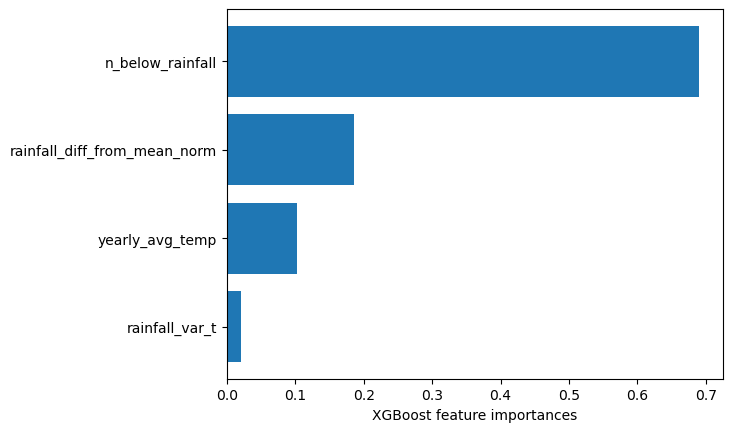

In [21]:
xgb_reg = xgb.XGBRegressor(learning_rate=0.1,
                            max_depth=3,
                            n_estimators=10)

X = low_oil_high_agriculture[feat]
y = low_oil_high_agriculture[target]
xgb_reg.fit(X, y)

ypreds = xgb_reg.predict(X)
rmse_xgb = root_mean_squared_error(y, ypreds)
print(f'rmse:{rmse_xgb:.4f}')

sorted_idx = xgb_reg.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb_reg.feature_importances_[sorted_idx])
plt.xlabel('XGBoost feature importances')
plt.plot()

rmse:0.0661


[]

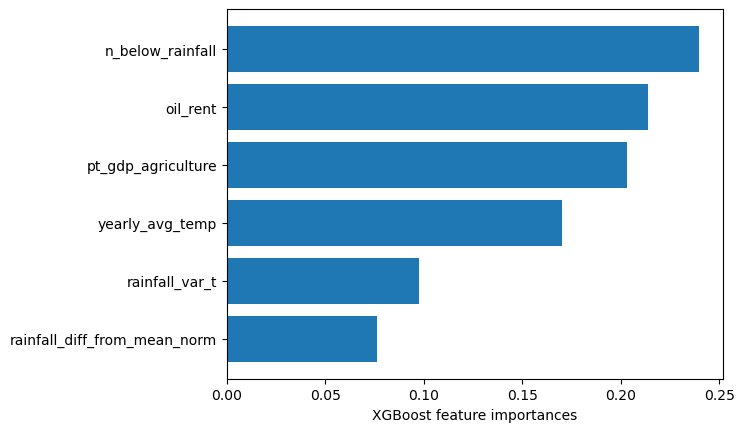

In [22]:
xgb_reg_2 = xgb.XGBRegressor(learning_rate=0.1,
                             max_depth=3,
                             n_estimators=10)

feat = ['n_below_rainfall', 'rainfall_var_t', 'rainfall_diff_from_mean_norm',
        'yearly_avg_temp', 'oil_rent', 'pt_gdp_agriculture']

target = 'gdp_g'

X = subset[feat]
y = subset[target]

xgb_reg_2.fit(X, y)

ypreds = xgb_reg_2.predict(X)
rmse_xgb_2 = root_mean_squared_error(y, ypreds)
print(f'rmse:{rmse_xgb_2:.4f}')

sorted_idx = xgb_reg_2.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb_reg_2.feature_importances_[sorted_idx])
plt.xlabel('XGBoost feature importances')
plt.plot()

rmse:0.0664


[]

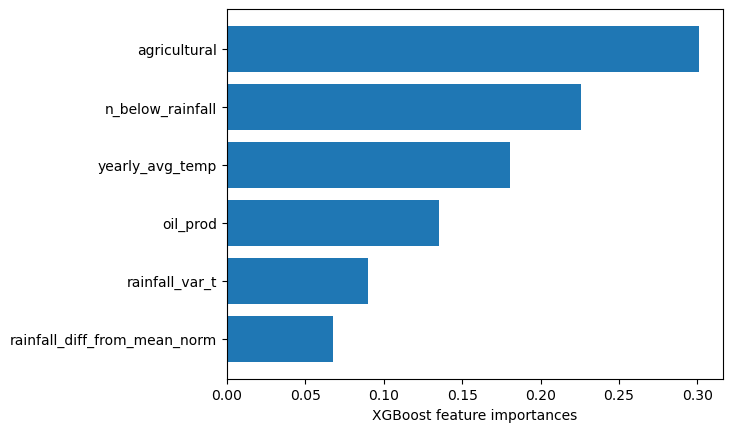

In [23]:
xgb_reg_2 = xgb.XGBRegressor(learning_rate=0.1,
                             max_depth=3,
                             n_estimators=10)

feat = ['n_below_rainfall', 'rainfall_var_t', 'rainfall_diff_from_mean_norm',
        'yearly_avg_temp', 'oil_prod', 'agricultural']

target = 'gdp_g'

X = subset[feat]
y = subset[target]

xgb_reg_2.fit(X, y)

ypreds = xgb_reg_2.predict(X)
rmse_xgb_2 = root_mean_squared_error(y, ypreds)
print(f'rmse:{rmse_xgb_2:.4f}')

sorted_idx = xgb_reg_2.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb_reg_2.feature_importances_[sorted_idx])
plt.xlabel('XGBoost feature importances')
plt.plot()

With proper cross validation. Requires writing a wrapper class for the XGBoost regressor ([described here](https://stackoverflow.com/a/51997797/2112406)). 

In [24]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBClassifier


class XGBoostForSklearn(BaseEstimator):
    def __init__(self, test_size=0.1, **estimator_params):
        self.test_size = test_size        
        if self.estimator is not None:
            self.set_params(**estimator_params)

    def set_params(self, **params):
        return self.estimator.set_params(**params)

    def get_params(self, **params):
        return self.estimator.get_params()

    def fit(self, X, y):
        x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size)
        self.estimator.fit(x_train, y_train, eval_set=[(x_val, y_val)])
        return self

    def predict(self, X):
        return self.estimator.predict(X)

class XGBoostRegressorForSklearn(XGBoostForSklearn):
    def __init__(self, *args, **kwargs):
        self.estimator = XGBRegressor()
        super(XGBoostRegressorForSklearn, self).__init__(*args, **kwargs)

class XGBoostClassifierForSklearn(XGBoostForSklearn):
    def __init__(self, *args, **kwargs):
        self.estimator = XGBClassifier()
        super(XGBoostClassifierForSklearn, self).__init__(*args, **kwargs)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBoostRegressorForSklearn())
])

param_grid = {
    'xgb__n_estimators': [10, 100, 500],
    'xgb__max_depth': [1, 3, 5, 10]
}

grid = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error')

feat = ['n_below_rainfall', 'rainfall_var_t', 'rainfall_diff_from_mean_norm',
        'yearly_avg_temp', 'oil_prod', 'agricultural']

target = 'gdp_g'

X = subset[feat].copy()
y = subset[target].copy()

grid.fit(X, y)

print(grid.best_params_, grid_cv.best_score_)

[0]	validation_0-rmse:0.07182
[1]	validation_0-rmse:0.07166
[2]	validation_0-rmse:0.07153
[3]	validation_0-rmse:0.07156
[4]	validation_0-rmse:0.07160
[5]	validation_0-rmse:0.07155
[6]	validation_0-rmse:0.07147
[7]	validation_0-rmse:0.07142
[8]	validation_0-rmse:0.07148
[9]	validation_0-rmse:0.07147
[0]	validation_0-rmse:0.06517
[1]	validation_0-rmse:0.06526
[2]	validation_0-rmse:0.06524
[3]	validation_0-rmse:0.06521
[4]	validation_0-rmse:0.06530
[5]	validation_0-rmse:0.06531
[6]	validation_0-rmse:0.06530
[7]	validation_0-rmse:0.06531
[8]	validation_0-rmse:0.06533
[9]	validation_0-rmse:0.06534
[0]	validation_0-rmse:0.06230
[1]	validation_0-rmse:0.06214
[2]	validation_0-rmse:0.06202
[3]	validation_0-rmse:0.06195
[4]	validation_0-rmse:0.06201
[5]	validation_0-rmse:0.06196
[6]	validation_0-rmse:0.06190
[7]	validation_0-rmse:0.06192
[8]	validation_0-rmse:0.06194
[9]	validation_0-rmse:0.06196
[0]	validation_0-rmse:0.06411
[1]	validation_0-rmse:0.06411
[2]	validation_0-rmse:0.06400
[3]	valida

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[20]	validation_0-rmse:0.06277
[21]	validation_0-rmse:0.06278
[22]	validation_0-rmse:0.06280
[23]	validation_0-rmse:0.06285
[24]	validation_0-rmse:0.06288
[25]	validation_0-rmse:0.06287
[26]	validation_0-rmse:0.06286
[27]	validation_0-rmse:0.06285
[28]	validation_0-rmse:0.06287
[29]	validation_0-rmse:0.06287
[30]	validation_0-rmse:0.06288
[31]	validation_0-rmse:0.06289
[32]	validation_0-rmse:0.06288
[33]	validation_0-rmse:0.06289
[34]	validation_0-rmse:0.06287
[35]	validation_0-rmse:0.06291
[36]	validation_0-rmse:0.06295
[37]	validation_0-rmse:0.06297
[38]	validation_0-rmse:0.06299
[39]	validation_0-rmse:0.06300
[40]	validation_0-rmse:0.06301
[41]	validation_0-rmse:0.06302
[42]	validation_0-rmse:0.06302
[43]	validation_0-rmse:0.06303
[44]	validation_0-rmse:0.06302
[45]	validation_0-rmse:0.06305
[46]	validation_0-rmse:0.06306
[47]	validation_0-rmse:0.06306
[48]	validation_0-rmse:0.06307
[49]	validation_0-rmse:0.06309
[50]	validation_0-rmse:0.06308
[51]	validation_0-rmse:0.06308
[52]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[38]	validation_0-rmse:0.06341
[39]	validation_0-rmse:0.06341
[40]	validation_0-rmse:0.06341
[41]	validation_0-rmse:0.06340
[42]	validation_0-rmse:0.06341
[43]	validation_0-rmse:0.06340
[44]	validation_0-rmse:0.06340
[45]	validation_0-rmse:0.06340
[46]	validation_0-rmse:0.06340
[47]	validation_0-rmse:0.06339
[48]	validation_0-rmse:0.06339
[49]	validation_0-rmse:0.06340
[50]	validation_0-rmse:0.06341
[51]	validation_0-rmse:0.06341
[52]	validation_0-rmse:0.06342
[53]	validation_0-rmse:0.06343
[54]	validation_0-rmse:0.06343
[55]	validation_0-rmse:0.06342
[56]	validation_0-rmse:0.06343
[57]	validation_0-rmse:0.06343
[58]	validation_0-rmse:0.06344
[59]	validation_0-rmse:0.06345
[60]	validation_0-rmse:0.06344
[61]	validation_0-rmse:0.06345
[62]	validation_0-rmse:0.06346
[63]	validation_0-rmse:0.06346
[64]	validation_0-rmse:0.06347
[65]	validation_0-rmse:0.06348
[66]	validation_0-rmse:0.06348
[67]	validation_0-rmse:0.06348
[68]	validation_0-rmse:0.06349
[69]	validation_0-rmse:0.06348
[70]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[48]	validation_0-rmse:0.05996
[49]	validation_0-rmse:0.05996
[50]	validation_0-rmse:0.05996
[51]	validation_0-rmse:0.05995
[52]	validation_0-rmse:0.05995
[53]	validation_0-rmse:0.05995
[54]	validation_0-rmse:0.05995
[55]	validation_0-rmse:0.05994
[56]	validation_0-rmse:0.05996
[57]	validation_0-rmse:0.05994
[58]	validation_0-rmse:0.05996
[59]	validation_0-rmse:0.05995
[60]	validation_0-rmse:0.05998
[61]	validation_0-rmse:0.05995
[62]	validation_0-rmse:0.05994
[63]	validation_0-rmse:0.05996
[64]	validation_0-rmse:0.05995
[65]	validation_0-rmse:0.05995
[66]	validation_0-rmse:0.05994
[67]	validation_0-rmse:0.05995
[68]	validation_0-rmse:0.05994
[69]	validation_0-rmse:0.05994
[70]	validation_0-rmse:0.05995
[71]	validation_0-rmse:0.05997
[72]	validation_0-rmse:0.05997
[73]	validation_0-rmse:0.05997
[74]	validation_0-rmse:0.05996
[75]	validation_0-rmse:0.05996
[76]	validation_0-rmse:0.05995
[77]	validation_0-rmse:0.05997
[78]	validation_0-rmse:0.05995
[79]	validation_0-rmse:0.05998
[80]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[63]	validation_0-rmse:0.08667
[64]	validation_0-rmse:0.08667
[65]	validation_0-rmse:0.08667
[66]	validation_0-rmse:0.08666
[67]	validation_0-rmse:0.08665
[68]	validation_0-rmse:0.08665
[69]	validation_0-rmse:0.08665
[70]	validation_0-rmse:0.08664
[71]	validation_0-rmse:0.08666
[72]	validation_0-rmse:0.08664
[73]	validation_0-rmse:0.08663
[74]	validation_0-rmse:0.08663
[75]	validation_0-rmse:0.08666
[76]	validation_0-rmse:0.08665
[77]	validation_0-rmse:0.08666
[78]	validation_0-rmse:0.08666
[79]	validation_0-rmse:0.08667
[80]	validation_0-rmse:0.08665
[81]	validation_0-rmse:0.08667
[82]	validation_0-rmse:0.08667
[83]	validation_0-rmse:0.08666
[84]	validation_0-rmse:0.08666
[85]	validation_0-rmse:0.08665
[86]	validation_0-rmse:0.08665
[87]	validation_0-rmse:0.08664
[88]	validation_0-rmse:0.08664
[89]	validation_0-rmse:0.08663
[90]	validation_0-rmse:0.08662
[91]	validation_0-rmse:0.08662
[92]	validation_0-rmse:0.08662
[93]	validation_0-rmse:0.08661
[94]	validation_0-rmse:0.08662
[95]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[40]	validation_0-rmse:0.06610
[41]	validation_0-rmse:0.06610
[42]	validation_0-rmse:0.06610
[43]	validation_0-rmse:0.06609
[44]	validation_0-rmse:0.06609
[45]	validation_0-rmse:0.06608
[46]	validation_0-rmse:0.06608
[47]	validation_0-rmse:0.06608
[48]	validation_0-rmse:0.06608
[49]	validation_0-rmse:0.06608
[50]	validation_0-rmse:0.06607
[51]	validation_0-rmse:0.06607
[52]	validation_0-rmse:0.06607
[53]	validation_0-rmse:0.06606
[54]	validation_0-rmse:0.06609
[55]	validation_0-rmse:0.06607
[56]	validation_0-rmse:0.06608
[57]	validation_0-rmse:0.06608
[58]	validation_0-rmse:0.06608
[59]	validation_0-rmse:0.06608
[60]	validation_0-rmse:0.06609
[61]	validation_0-rmse:0.06608
[62]	validation_0-rmse:0.06607
[63]	validation_0-rmse:0.06607
[64]	validation_0-rmse:0.06608
[65]	validation_0-rmse:0.06607
[66]	validation_0-rmse:0.06607
[67]	validation_0-rmse:0.06606
[68]	validation_0-rmse:0.06604
[69]	validation_0-rmse:0.06606
[70]	validation_0-rmse:0.06605
[71]	validation_0-rmse:0.06606
[72]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[84]	validation_0-rmse:0.06246
[85]	validation_0-rmse:0.06246
[86]	validation_0-rmse:0.06246
[87]	validation_0-rmse:0.06246
[88]	validation_0-rmse:0.06245
[89]	validation_0-rmse:0.06246
[90]	validation_0-rmse:0.06246
[91]	validation_0-rmse:0.06245
[92]	validation_0-rmse:0.06245
[93]	validation_0-rmse:0.06245
[94]	validation_0-rmse:0.06245
[95]	validation_0-rmse:0.06245
[96]	validation_0-rmse:0.06244
[97]	validation_0-rmse:0.06245
[98]	validation_0-rmse:0.06246
[99]	validation_0-rmse:0.06246
[100]	validation_0-rmse:0.06247
[101]	validation_0-rmse:0.06245
[102]	validation_0-rmse:0.06246
[103]	validation_0-rmse:0.06247
[104]	validation_0-rmse:0.06247
[105]	validation_0-rmse:0.06247
[106]	validation_0-rmse:0.06248
[107]	validation_0-rmse:0.06249
[108]	validation_0-rmse:0.06250
[109]	validation_0-rmse:0.06249
[110]	validation_0-rmse:0.06249
[111]	validation_0-rmse:0.06248
[112]	validation_0-rmse:0.06248
[113]	validation_0-rmse:0.06249
[114]	validation_0-rmse:0.06249
[115]	validation_0-rmse:

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[69]	validation_0-rmse:0.05969
[70]	validation_0-rmse:0.05971
[71]	validation_0-rmse:0.05971
[72]	validation_0-rmse:0.05971
[73]	validation_0-rmse:0.05973
[74]	validation_0-rmse:0.05972
[75]	validation_0-rmse:0.05971
[76]	validation_0-rmse:0.05971
[77]	validation_0-rmse:0.05973
[78]	validation_0-rmse:0.05971
[79]	validation_0-rmse:0.05972
[80]	validation_0-rmse:0.05971
[81]	validation_0-rmse:0.05970
[82]	validation_0-rmse:0.05972
[83]	validation_0-rmse:0.05972
[84]	validation_0-rmse:0.05973
[85]	validation_0-rmse:0.05973
[86]	validation_0-rmse:0.05975
[87]	validation_0-rmse:0.05973
[88]	validation_0-rmse:0.05974
[89]	validation_0-rmse:0.05975
[90]	validation_0-rmse:0.05975
[91]	validation_0-rmse:0.05975
[92]	validation_0-rmse:0.05976
[93]	validation_0-rmse:0.05975
[94]	validation_0-rmse:0.05976
[95]	validation_0-rmse:0.05975
[96]	validation_0-rmse:0.05976
[97]	validation_0-rmse:0.05978
[98]	validation_0-rmse:0.05979
[99]	validation_0-rmse:0.05977
[100]	validation_0-rmse:0.05979
[101]	v

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[82]	validation_0-rmse:0.05428
[83]	validation_0-rmse:0.05427
[84]	validation_0-rmse:0.05428
[85]	validation_0-rmse:0.05428
[86]	validation_0-rmse:0.05429
[87]	validation_0-rmse:0.05428
[88]	validation_0-rmse:0.05428
[89]	validation_0-rmse:0.05428
[90]	validation_0-rmse:0.05428
[91]	validation_0-rmse:0.05428
[92]	validation_0-rmse:0.05428
[93]	validation_0-rmse:0.05428
[94]	validation_0-rmse:0.05428
[95]	validation_0-rmse:0.05427
[96]	validation_0-rmse:0.05428
[97]	validation_0-rmse:0.05429
[98]	validation_0-rmse:0.05428
[99]	validation_0-rmse:0.05428
[100]	validation_0-rmse:0.05428
[101]	validation_0-rmse:0.05428
[102]	validation_0-rmse:0.05428
[103]	validation_0-rmse:0.05430
[104]	validation_0-rmse:0.05429
[105]	validation_0-rmse:0.05429
[106]	validation_0-rmse:0.05429
[107]	validation_0-rmse:0.05429
[108]	validation_0-rmse:0.05428
[109]	validation_0-rmse:0.05429
[110]	validation_0-rmse:0.05429
[111]	validation_0-rmse:0.05429
[112]	validation_0-rmse:0.05430
[113]	validation_0-rmse:0.

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[37]	validation_0-rmse:0.06891
[38]	validation_0-rmse:0.06892
[39]	validation_0-rmse:0.06891
[40]	validation_0-rmse:0.06891
[41]	validation_0-rmse:0.06891
[42]	validation_0-rmse:0.06891
[43]	validation_0-rmse:0.06892
[44]	validation_0-rmse:0.06891
[45]	validation_0-rmse:0.06894
[46]	validation_0-rmse:0.06892
[47]	validation_0-rmse:0.06892
[48]	validation_0-rmse:0.06892
[49]	validation_0-rmse:0.06892
[50]	validation_0-rmse:0.06892
[51]	validation_0-rmse:0.06892
[52]	validation_0-rmse:0.06893
[53]	validation_0-rmse:0.06891
[54]	validation_0-rmse:0.06893
[55]	validation_0-rmse:0.06895
[56]	validation_0-rmse:0.06893
[57]	validation_0-rmse:0.06894
[58]	validation_0-rmse:0.06893
[59]	validation_0-rmse:0.06893
[60]	validation_0-rmse:0.06892
[61]	validation_0-rmse:0.06893
[62]	validation_0-rmse:0.06893
[63]	validation_0-rmse:0.06892
[64]	validation_0-rmse:0.06892
[65]	validation_0-rmse:0.06893
[66]	validation_0-rmse:0.06893
[67]	validation_0-rmse:0.06892
[68]	validation_0-rmse:0.06891
[69]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[63]	validation_0-rmse:0.07579
[64]	validation_0-rmse:0.07580
[65]	validation_0-rmse:0.07579
[66]	validation_0-rmse:0.07578
[67]	validation_0-rmse:0.07578
[68]	validation_0-rmse:0.07578
[69]	validation_0-rmse:0.07578
[70]	validation_0-rmse:0.07579
[71]	validation_0-rmse:0.07578
[72]	validation_0-rmse:0.07578
[73]	validation_0-rmse:0.07578
[74]	validation_0-rmse:0.07577
[75]	validation_0-rmse:0.07578
[76]	validation_0-rmse:0.07578
[77]	validation_0-rmse:0.07577
[78]	validation_0-rmse:0.07577
[79]	validation_0-rmse:0.07577
[80]	validation_0-rmse:0.07577
[81]	validation_0-rmse:0.07579
[82]	validation_0-rmse:0.07578
[83]	validation_0-rmse:0.07576
[84]	validation_0-rmse:0.07577
[85]	validation_0-rmse:0.07578
[86]	validation_0-rmse:0.07578
[87]	validation_0-rmse:0.07577
[88]	validation_0-rmse:0.07578
[89]	validation_0-rmse:0.07577
[90]	validation_0-rmse:0.07577
[91]	validation_0-rmse:0.07576
[92]	validation_0-rmse:0.07576
[93]	validation_0-rmse:0.07576
[94]	validation_0-rmse:0.07576
[95]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[9]	validation_0-rmse:0.06599
[0]	validation_0-rmse:0.07056
[1]	validation_0-rmse:0.07036
[2]	validation_0-rmse:0.07040
[3]	validation_0-rmse:0.07004
[4]	validation_0-rmse:0.07008
[5]	validation_0-rmse:0.07014
[6]	validation_0-rmse:0.06997
[7]	validation_0-rmse:0.06991
[8]	validation_0-rmse:0.06997
[9]	validation_0-rmse:0.06993
[10]	validation_0-rmse:0.06993
[11]	validation_0-rmse:0.06993
[12]	validation_0-rmse:0.06993
[13]	validation_0-rmse:0.06981
[14]	validation_0-rmse:0.06981
[15]	validation_0-rmse:0.06988
[16]	validation_0-rmse:0.06988
[17]	validation_0-rmse:0.06981
[18]	validation_0-rmse:0.06980
[19]	validation_0-rmse:0.06968
[20]	validation_0-rmse:0.06973
[21]	validation_0-rmse:0.06956
[22]	validation_0-rmse:0.06964
[23]	validation_0-rmse:0.06963
[24]	validation_0-rmse:0.06963
[25]	validation_0-rmse:0.06970
[26]	validation_0-rmse:0.06969
[27]	validation_0-rmse:0.06971
[28]	validation_0-rmse:0.06972
[29]	validation_0-rmse:0.06967
[30]	validation_0-rmse:0.06966
[31]	validation_0-r

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[90]	validation_0-rmse:0.06980
[91]	validation_0-rmse:0.06980
[92]	validation_0-rmse:0.06981
[93]	validation_0-rmse:0.06982
[94]	validation_0-rmse:0.06985
[95]	validation_0-rmse:0.06988
[96]	validation_0-rmse:0.06985
[97]	validation_0-rmse:0.06987
[98]	validation_0-rmse:0.06987
[99]	validation_0-rmse:0.06986
[0]	validation_0-rmse:0.07594
[1]	validation_0-rmse:0.07586
[2]	validation_0-rmse:0.07585
[3]	validation_0-rmse:0.07587
[4]	validation_0-rmse:0.07589
[5]	validation_0-rmse:0.07591
[6]	validation_0-rmse:0.07590
[7]	validation_0-rmse:0.07609
[8]	validation_0-rmse:0.07607
[9]	validation_0-rmse:0.07611
[10]	validation_0-rmse:0.07616
[11]	validation_0-rmse:0.07615
[12]	validation_0-rmse:0.07623
[13]	validation_0-rmse:0.07621
[14]	validation_0-rmse:0.07622
[15]	validation_0-rmse:0.07627
[16]	validation_0-rmse:0.07628
[17]	validation_0-rmse:0.07627
[18]	validation_0-rmse:0.07627
[19]	validation_0-rmse:0.07620
[20]	validation_0-rmse:0.07623
[21]	validation_0-rmse:0.07626
[22]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[80]	validation_0-rmse:0.07778
[81]	validation_0-rmse:0.07779
[82]	validation_0-rmse:0.07782
[83]	validation_0-rmse:0.07786
[84]	validation_0-rmse:0.07786
[85]	validation_0-rmse:0.07783
[86]	validation_0-rmse:0.07784
[87]	validation_0-rmse:0.07787
[88]	validation_0-rmse:0.07789
[89]	validation_0-rmse:0.07788
[90]	validation_0-rmse:0.07788
[91]	validation_0-rmse:0.07787
[92]	validation_0-rmse:0.07783
[93]	validation_0-rmse:0.07788
[94]	validation_0-rmse:0.07788
[95]	validation_0-rmse:0.07782
[96]	validation_0-rmse:0.07780
[97]	validation_0-rmse:0.07788
[98]	validation_0-rmse:0.07791
[99]	validation_0-rmse:0.07790
[0]	validation_0-rmse:0.05965
[1]	validation_0-rmse:0.05954
[2]	validation_0-rmse:0.05942
[3]	validation_0-rmse:0.05938
[4]	validation_0-rmse:0.05946
[5]	validation_0-rmse:0.05943
[6]	validation_0-rmse:0.05930
[7]	validation_0-rmse:0.05930
[8]	validation_0-rmse:0.05923
[9]	validation_0-rmse:0.05926
[10]	validation_0-rmse:0.05926
[11]	validation_0-rmse:0.05935
[12]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[91]	validation_0-rmse:0.06085
[92]	validation_0-rmse:0.06096
[93]	validation_0-rmse:0.06098
[94]	validation_0-rmse:0.06104
[95]	validation_0-rmse:0.06107
[96]	validation_0-rmse:0.06109
[97]	validation_0-rmse:0.06112
[98]	validation_0-rmse:0.06122
[99]	validation_0-rmse:0.06122
[0]	validation_0-rmse:0.06247
[1]	validation_0-rmse:0.06229
[2]	validation_0-rmse:0.06223
[3]	validation_0-rmse:0.06222
[4]	validation_0-rmse:0.06227
[5]	validation_0-rmse:0.06215
[6]	validation_0-rmse:0.06190
[7]	validation_0-rmse:0.06180
[8]	validation_0-rmse:0.06202
[9]	validation_0-rmse:0.06209
[10]	validation_0-rmse:0.06222
[11]	validation_0-rmse:0.06233
[12]	validation_0-rmse:0.06236
[13]	validation_0-rmse:0.06248
[14]	validation_0-rmse:0.06246
[15]	validation_0-rmse:0.06255
[16]	validation_0-rmse:0.06257
[17]	validation_0-rmse:0.06250
[18]	validation_0-rmse:0.06255
[19]	validation_0-rmse:0.06256
[20]	validation_0-rmse:0.06257
[21]	validation_0-rmse:0.06264
[22]	validation_0-rmse:0.06271
[23]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[80]	validation_0-rmse:0.06340
[81]	validation_0-rmse:0.06342
[82]	validation_0-rmse:0.06343
[83]	validation_0-rmse:0.06343
[84]	validation_0-rmse:0.06340
[85]	validation_0-rmse:0.06338
[86]	validation_0-rmse:0.06346
[87]	validation_0-rmse:0.06349
[88]	validation_0-rmse:0.06351
[89]	validation_0-rmse:0.06351
[90]	validation_0-rmse:0.06351
[91]	validation_0-rmse:0.06350
[92]	validation_0-rmse:0.06354
[93]	validation_0-rmse:0.06356
[94]	validation_0-rmse:0.06357
[95]	validation_0-rmse:0.06357
[96]	validation_0-rmse:0.06353
[97]	validation_0-rmse:0.06356
[98]	validation_0-rmse:0.06360
[99]	validation_0-rmse:0.06367
[0]	validation_0-rmse:0.07442
[1]	validation_0-rmse:0.07440
[2]	validation_0-rmse:0.07443
[3]	validation_0-rmse:0.07447
[4]	validation_0-rmse:0.07454
[5]	validation_0-rmse:0.07456
[6]	validation_0-rmse:0.07453
[7]	validation_0-rmse:0.07450
[8]	validation_0-rmse:0.07471
[9]	validation_0-rmse:0.07472
[10]	validation_0-rmse:0.07466
[11]	validation_0-rmse:0.07464
[12]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[78]	validation_0-rmse:0.07866
[79]	validation_0-rmse:0.07872
[80]	validation_0-rmse:0.07876
[81]	validation_0-rmse:0.07878
[82]	validation_0-rmse:0.07988
[83]	validation_0-rmse:0.07985
[84]	validation_0-rmse:0.07985
[85]	validation_0-rmse:0.07989
[86]	validation_0-rmse:0.07990
[87]	validation_0-rmse:0.07989
[88]	validation_0-rmse:0.07993
[89]	validation_0-rmse:0.07993
[90]	validation_0-rmse:0.07984
[91]	validation_0-rmse:0.07990
[92]	validation_0-rmse:0.07996
[93]	validation_0-rmse:0.07994
[94]	validation_0-rmse:0.07998
[95]	validation_0-rmse:0.07998
[96]	validation_0-rmse:0.07996
[97]	validation_0-rmse:0.07998
[98]	validation_0-rmse:0.08000
[99]	validation_0-rmse:0.07997
[0]	validation_0-rmse:0.06644
[1]	validation_0-rmse:0.06600
[2]	validation_0-rmse:0.06583
[3]	validation_0-rmse:0.06562
[4]	validation_0-rmse:0.06549
[5]	validation_0-rmse:0.06536
[6]	validation_0-rmse:0.06537
[7]	validation_0-rmse:0.06536
[8]	validation_0-rmse:0.06538
[9]	validation_0-rmse:0.06537
[10]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[74]	validation_0-rmse:0.06582
[75]	validation_0-rmse:0.06575
[76]	validation_0-rmse:0.06573
[77]	validation_0-rmse:0.06569
[78]	validation_0-rmse:0.06575
[79]	validation_0-rmse:0.06576
[80]	validation_0-rmse:0.06579
[81]	validation_0-rmse:0.06590
[82]	validation_0-rmse:0.06591
[83]	validation_0-rmse:0.06598
[84]	validation_0-rmse:0.06592
[85]	validation_0-rmse:0.06588
[86]	validation_0-rmse:0.06590
[87]	validation_0-rmse:0.06588
[88]	validation_0-rmse:0.06631
[89]	validation_0-rmse:0.06632
[90]	validation_0-rmse:0.06632
[91]	validation_0-rmse:0.06641
[92]	validation_0-rmse:0.06643
[93]	validation_0-rmse:0.06641
[94]	validation_0-rmse:0.06638
[95]	validation_0-rmse:0.06636
[96]	validation_0-rmse:0.06634
[97]	validation_0-rmse:0.06641
[98]	validation_0-rmse:0.06642
[99]	validation_0-rmse:0.06644
[100]	validation_0-rmse:0.06642
[101]	validation_0-rmse:0.06648
[102]	validation_0-rmse:0.06696
[103]	validation_0-rmse:0.06714
[104]	validation_0-rmse:0.06716
[105]	validation_0-rmse:0.06727
[1

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[56]	validation_0-rmse:0.06406
[57]	validation_0-rmse:0.06409
[58]	validation_0-rmse:0.06411
[59]	validation_0-rmse:0.06395
[60]	validation_0-rmse:0.06394
[61]	validation_0-rmse:0.06399
[62]	validation_0-rmse:0.06411
[63]	validation_0-rmse:0.06409
[64]	validation_0-rmse:0.06410
[65]	validation_0-rmse:0.06403
[66]	validation_0-rmse:0.06404
[67]	validation_0-rmse:0.06404
[68]	validation_0-rmse:0.06404
[69]	validation_0-rmse:0.06399
[70]	validation_0-rmse:0.06403
[71]	validation_0-rmse:0.06402
[72]	validation_0-rmse:0.06401
[73]	validation_0-rmse:0.06425
[74]	validation_0-rmse:0.06417
[75]	validation_0-rmse:0.06420
[76]	validation_0-rmse:0.06425
[77]	validation_0-rmse:0.06427
[78]	validation_0-rmse:0.06423
[79]	validation_0-rmse:0.06422
[80]	validation_0-rmse:0.06423
[81]	validation_0-rmse:0.06425
[82]	validation_0-rmse:0.06434
[83]	validation_0-rmse:0.06435
[84]	validation_0-rmse:0.06436
[85]	validation_0-rmse:0.06483
[86]	validation_0-rmse:0.06489
[87]	validation_0-rmse:0.06491
[88]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[67]	validation_0-rmse:0.05323
[68]	validation_0-rmse:0.05321
[69]	validation_0-rmse:0.05318
[70]	validation_0-rmse:0.05320
[71]	validation_0-rmse:0.05319
[72]	validation_0-rmse:0.05319
[73]	validation_0-rmse:0.05320
[74]	validation_0-rmse:0.05330
[75]	validation_0-rmse:0.05331
[76]	validation_0-rmse:0.05327
[77]	validation_0-rmse:0.05335
[78]	validation_0-rmse:0.05335
[79]	validation_0-rmse:0.05331
[80]	validation_0-rmse:0.05329
[81]	validation_0-rmse:0.05334
[82]	validation_0-rmse:0.05335
[83]	validation_0-rmse:0.05334
[84]	validation_0-rmse:0.05335
[85]	validation_0-rmse:0.05350
[86]	validation_0-rmse:0.05353
[87]	validation_0-rmse:0.05353
[88]	validation_0-rmse:0.05364
[89]	validation_0-rmse:0.05362
[90]	validation_0-rmse:0.05369
[91]	validation_0-rmse:0.05365
[92]	validation_0-rmse:0.05367
[93]	validation_0-rmse:0.05366
[94]	validation_0-rmse:0.05372
[95]	validation_0-rmse:0.05375
[96]	validation_0-rmse:0.05372
[97]	validation_0-rmse:0.05367
[98]	validation_0-rmse:0.05372
[99]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[78]	validation_0-rmse:0.06296
[79]	validation_0-rmse:0.06297
[80]	validation_0-rmse:0.06298
[81]	validation_0-rmse:0.06298
[82]	validation_0-rmse:0.06299
[83]	validation_0-rmse:0.06302
[84]	validation_0-rmse:0.06306
[85]	validation_0-rmse:0.06308
[86]	validation_0-rmse:0.06310
[87]	validation_0-rmse:0.06320
[88]	validation_0-rmse:0.06323
[89]	validation_0-rmse:0.06342
[90]	validation_0-rmse:0.06343
[91]	validation_0-rmse:0.06351
[92]	validation_0-rmse:0.06353
[93]	validation_0-rmse:0.06355
[94]	validation_0-rmse:0.06358
[95]	validation_0-rmse:0.06359
[96]	validation_0-rmse:0.06358
[97]	validation_0-rmse:0.06361
[98]	validation_0-rmse:0.06357
[99]	validation_0-rmse:0.06361
[100]	validation_0-rmse:0.06361
[101]	validation_0-rmse:0.06362
[102]	validation_0-rmse:0.06361
[103]	validation_0-rmse:0.06370
[104]	validation_0-rmse:0.06378
[105]	validation_0-rmse:0.06385
[106]	validation_0-rmse:0.06381
[107]	validation_0-rmse:0.06378
[108]	validation_0-rmse:0.06379
[109]	validation_0-rmse:0.0638

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[67]	validation_0-rmse:0.05863
[68]	validation_0-rmse:0.05863
[69]	validation_0-rmse:0.05862
[70]	validation_0-rmse:0.05858
[71]	validation_0-rmse:0.05860
[72]	validation_0-rmse:0.05859
[73]	validation_0-rmse:0.05858
[74]	validation_0-rmse:0.05860
[75]	validation_0-rmse:0.05867
[76]	validation_0-rmse:0.05864
[77]	validation_0-rmse:0.05869
[78]	validation_0-rmse:0.05869
[79]	validation_0-rmse:0.05876
[80]	validation_0-rmse:0.05877
[81]	validation_0-rmse:0.05886
[82]	validation_0-rmse:0.05888
[83]	validation_0-rmse:0.05888
[84]	validation_0-rmse:0.05889
[85]	validation_0-rmse:0.05896
[86]	validation_0-rmse:0.05899
[87]	validation_0-rmse:0.05901
[88]	validation_0-rmse:0.05900
[89]	validation_0-rmse:0.05898
[90]	validation_0-rmse:0.05899
[91]	validation_0-rmse:0.05926
[92]	validation_0-rmse:0.05925
[93]	validation_0-rmse:0.05930
[94]	validation_0-rmse:0.05934
[95]	validation_0-rmse:0.05935
[96]	validation_0-rmse:0.05938
[97]	validation_0-rmse:0.05941
[98]	validation_0-rmse:0.05952
[99]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[0]	validation_0-rmse:0.06632
[1]	validation_0-rmse:0.06621
[2]	validation_0-rmse:0.06629
[3]	validation_0-rmse:0.06647
[4]	validation_0-rmse:0.06650
[5]	validation_0-rmse:0.06672
[6]	validation_0-rmse:0.06664
[7]	validation_0-rmse:0.06667
[8]	validation_0-rmse:0.06660
[9]	validation_0-rmse:0.06681
[0]	validation_0-rmse:0.06920
[1]	validation_0-rmse:0.06907
[2]	validation_0-rmse:0.06926
[3]	validation_0-rmse:0.06952
[4]	validation_0-rmse:0.06983
[5]	validation_0-rmse:0.06982
[6]	validation_0-rmse:0.06991
[7]	validation_0-rmse:0.07014
[8]	validation_0-rmse:0.07011
[9]	validation_0-rmse:0.07011
[10]	validation_0-rmse:0.07007
[11]	validation_0-rmse:0.07009
[12]	validation_0-rmse:0.07020
[13]	validation_0-rmse:0.07022
[14]	validation_0-rmse:0.07021
[15]	validation_0-rmse:0.07038
[16]	validation_0-rmse:0.07059
[17]	validation_0-rmse:0.07069
[18]	validation_0-rmse:0.07070
[19]	validation_0-rmse:0.07078
[20]	validation_0-rmse:0.07084
[21]	validation_0-rmse:0.07075
[22]	validation_0-rmse:0.070

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[73]	validation_0-rmse:0.07352
[74]	validation_0-rmse:0.07353
[75]	validation_0-rmse:0.07347
[76]	validation_0-rmse:0.07344
[77]	validation_0-rmse:0.07357
[78]	validation_0-rmse:0.07365
[79]	validation_0-rmse:0.07364
[80]	validation_0-rmse:0.07368
[81]	validation_0-rmse:0.07372
[82]	validation_0-rmse:0.07377
[83]	validation_0-rmse:0.07381
[84]	validation_0-rmse:0.07380
[85]	validation_0-rmse:0.07376
[86]	validation_0-rmse:0.07379
[87]	validation_0-rmse:0.07378
[88]	validation_0-rmse:0.07381
[89]	validation_0-rmse:0.07386
[90]	validation_0-rmse:0.07378
[91]	validation_0-rmse:0.07371
[92]	validation_0-rmse:0.07370
[93]	validation_0-rmse:0.07377
[94]	validation_0-rmse:0.07380
[95]	validation_0-rmse:0.07388
[96]	validation_0-rmse:0.07381
[97]	validation_0-rmse:0.07385
[98]	validation_0-rmse:0.07378
[99]	validation_0-rmse:0.07379
[0]	validation_0-rmse:0.06949
[1]	validation_0-rmse:0.06912
[2]	validation_0-rmse:0.06915
[3]	validation_0-rmse:0.06921
[4]	validation_0-rmse:0.06898
[5]	validatio

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[60]	validation_0-rmse:0.07394
[61]	validation_0-rmse:0.07397
[62]	validation_0-rmse:0.07399
[63]	validation_0-rmse:0.07402
[64]	validation_0-rmse:0.07417
[65]	validation_0-rmse:0.07418
[66]	validation_0-rmse:0.07422
[67]	validation_0-rmse:0.07433
[68]	validation_0-rmse:0.07436
[69]	validation_0-rmse:0.07424
[70]	validation_0-rmse:0.07415
[71]	validation_0-rmse:0.07417
[72]	validation_0-rmse:0.07416
[73]	validation_0-rmse:0.07419
[74]	validation_0-rmse:0.07420
[75]	validation_0-rmse:0.07438
[76]	validation_0-rmse:0.07435
[77]	validation_0-rmse:0.07436
[78]	validation_0-rmse:0.07443
[79]	validation_0-rmse:0.07441
[80]	validation_0-rmse:0.07448
[81]	validation_0-rmse:0.07445
[82]	validation_0-rmse:0.07458
[83]	validation_0-rmse:0.07458
[84]	validation_0-rmse:0.07457
[85]	validation_0-rmse:0.07464
[86]	validation_0-rmse:0.07470
[87]	validation_0-rmse:0.07466
[88]	validation_0-rmse:0.07466
[89]	validation_0-rmse:0.07472
[90]	validation_0-rmse:0.07477
[91]	validation_0-rmse:0.07479
[92]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[73]	validation_0-rmse:0.06569
[74]	validation_0-rmse:0.06568
[75]	validation_0-rmse:0.06568
[76]	validation_0-rmse:0.06582
[77]	validation_0-rmse:0.06585
[78]	validation_0-rmse:0.06583
[79]	validation_0-rmse:0.06586
[80]	validation_0-rmse:0.06574
[81]	validation_0-rmse:0.06576
[82]	validation_0-rmse:0.06584
[83]	validation_0-rmse:0.06584
[84]	validation_0-rmse:0.06586
[85]	validation_0-rmse:0.06602
[86]	validation_0-rmse:0.06602
[87]	validation_0-rmse:0.06604
[88]	validation_0-rmse:0.06607
[89]	validation_0-rmse:0.06603
[90]	validation_0-rmse:0.06603
[91]	validation_0-rmse:0.06599
[92]	validation_0-rmse:0.06600
[93]	validation_0-rmse:0.06591
[94]	validation_0-rmse:0.06587
[95]	validation_0-rmse:0.06587
[96]	validation_0-rmse:0.06584
[97]	validation_0-rmse:0.06584
[98]	validation_0-rmse:0.06583
[99]	validation_0-rmse:0.06587
[0]	validation_0-rmse:0.08210
[1]	validation_0-rmse:0.08209
[2]	validation_0-rmse:0.08191
[3]	validation_0-rmse:0.08184
[4]	validation_0-rmse:0.08196
[5]	validatio

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[56]	validation_0-rmse:0.08338
[57]	validation_0-rmse:0.08344
[58]	validation_0-rmse:0.08346
[59]	validation_0-rmse:0.08356
[60]	validation_0-rmse:0.08358
[61]	validation_0-rmse:0.08359
[62]	validation_0-rmse:0.08375
[63]	validation_0-rmse:0.08373
[64]	validation_0-rmse:0.08375
[65]	validation_0-rmse:0.08380
[66]	validation_0-rmse:0.08380
[67]	validation_0-rmse:0.08385
[68]	validation_0-rmse:0.08384
[69]	validation_0-rmse:0.08387
[70]	validation_0-rmse:0.08391
[71]	validation_0-rmse:0.08396
[72]	validation_0-rmse:0.08396
[73]	validation_0-rmse:0.08398
[74]	validation_0-rmse:0.08399
[75]	validation_0-rmse:0.08414
[76]	validation_0-rmse:0.08403
[77]	validation_0-rmse:0.08406
[78]	validation_0-rmse:0.08402
[79]	validation_0-rmse:0.08406
[80]	validation_0-rmse:0.08421
[81]	validation_0-rmse:0.08418
[82]	validation_0-rmse:0.08415
[83]	validation_0-rmse:0.08408
[84]	validation_0-rmse:0.08416
[85]	validation_0-rmse:0.08410
[86]	validation_0-rmse:0.08408
[87]	validation_0-rmse:0.08402
[88]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[54]	validation_0-rmse:0.06771
[55]	validation_0-rmse:0.06774
[56]	validation_0-rmse:0.06769
[57]	validation_0-rmse:0.06785
[58]	validation_0-rmse:0.06795
[59]	validation_0-rmse:0.06802
[60]	validation_0-rmse:0.06801
[61]	validation_0-rmse:0.06820
[62]	validation_0-rmse:0.06826
[63]	validation_0-rmse:0.06829
[64]	validation_0-rmse:0.06838
[65]	validation_0-rmse:0.06840
[66]	validation_0-rmse:0.06848
[67]	validation_0-rmse:0.06845
[68]	validation_0-rmse:0.06844
[69]	validation_0-rmse:0.06839
[70]	validation_0-rmse:0.06856
[71]	validation_0-rmse:0.06850
[72]	validation_0-rmse:0.06853
[73]	validation_0-rmse:0.06881
[74]	validation_0-rmse:0.06886
[75]	validation_0-rmse:0.06902
[76]	validation_0-rmse:0.06906
[77]	validation_0-rmse:0.06911
[78]	validation_0-rmse:0.06909
[79]	validation_0-rmse:0.06910
[80]	validation_0-rmse:0.06916
[81]	validation_0-rmse:0.06914
[82]	validation_0-rmse:0.06921
[83]	validation_0-rmse:0.06918
[84]	validation_0-rmse:0.06934
[85]	validation_0-rmse:0.06936
[86]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[77]	validation_0-rmse:0.06827
[78]	validation_0-rmse:0.06827
[79]	validation_0-rmse:0.06831
[80]	validation_0-rmse:0.06840
[81]	validation_0-rmse:0.06842
[82]	validation_0-rmse:0.06841
[83]	validation_0-rmse:0.06843
[84]	validation_0-rmse:0.06843
[85]	validation_0-rmse:0.06844
[86]	validation_0-rmse:0.06843
[87]	validation_0-rmse:0.06849
[88]	validation_0-rmse:0.06856
[89]	validation_0-rmse:0.06856
[90]	validation_0-rmse:0.06847
[91]	validation_0-rmse:0.06849
[92]	validation_0-rmse:0.06854
[93]	validation_0-rmse:0.06848
[94]	validation_0-rmse:0.06849
[95]	validation_0-rmse:0.06852
[96]	validation_0-rmse:0.06852
[97]	validation_0-rmse:0.06855
[98]	validation_0-rmse:0.06855
[99]	validation_0-rmse:0.06867
[100]	validation_0-rmse:0.06860
[101]	validation_0-rmse:0.06858
[102]	validation_0-rmse:0.06859
[103]	validation_0-rmse:0.06863
[104]	validation_0-rmse:0.06870
[105]	validation_0-rmse:0.06870
[106]	validation_0-rmse:0.06877
[107]	validation_0-rmse:0.06869
[108]	validation_0-rmse:0.06868

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[37]	validation_0-rmse:0.06647
[38]	validation_0-rmse:0.06716
[39]	validation_0-rmse:0.06727
[40]	validation_0-rmse:0.06714
[41]	validation_0-rmse:0.06721
[42]	validation_0-rmse:0.06729
[43]	validation_0-rmse:0.06725
[44]	validation_0-rmse:0.06731
[45]	validation_0-rmse:0.06745
[46]	validation_0-rmse:0.06742
[47]	validation_0-rmse:0.06745
[48]	validation_0-rmse:0.06744
[49]	validation_0-rmse:0.06744
[50]	validation_0-rmse:0.06742
[51]	validation_0-rmse:0.06743
[52]	validation_0-rmse:0.06746
[53]	validation_0-rmse:0.06747
[54]	validation_0-rmse:0.06750
[55]	validation_0-rmse:0.06748
[56]	validation_0-rmse:0.06735
[57]	validation_0-rmse:0.06764
[58]	validation_0-rmse:0.06761
[59]	validation_0-rmse:0.06794
[60]	validation_0-rmse:0.06802
[61]	validation_0-rmse:0.06804
[62]	validation_0-rmse:0.06807
[63]	validation_0-rmse:0.06808
[64]	validation_0-rmse:0.06812
[65]	validation_0-rmse:0.06822
[66]	validation_0-rmse:0.06821
[67]	validation_0-rmse:0.06812
[68]	validation_0-rmse:0.06815
[69]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[36]	validation_0-rmse:0.06678
[37]	validation_0-rmse:0.06680
[38]	validation_0-rmse:0.06680
[39]	validation_0-rmse:0.06674
[40]	validation_0-rmse:0.06673
[41]	validation_0-rmse:0.06675
[42]	validation_0-rmse:0.06672
[43]	validation_0-rmse:0.06672
[44]	validation_0-rmse:0.06666
[45]	validation_0-rmse:0.06667
[46]	validation_0-rmse:0.06667
[47]	validation_0-rmse:0.06671
[48]	validation_0-rmse:0.06668
[49]	validation_0-rmse:0.06671
[50]	validation_0-rmse:0.06672
[51]	validation_0-rmse:0.06669
[52]	validation_0-rmse:0.06681
[53]	validation_0-rmse:0.06688
[54]	validation_0-rmse:0.06683
[55]	validation_0-rmse:0.06692
[56]	validation_0-rmse:0.06698
[57]	validation_0-rmse:0.06700
[58]	validation_0-rmse:0.06704
[59]	validation_0-rmse:0.06709
[60]	validation_0-rmse:0.06709
[61]	validation_0-rmse:0.06703
[62]	validation_0-rmse:0.06707
[63]	validation_0-rmse:0.06708
[64]	validation_0-rmse:0.06712
[65]	validation_0-rmse:0.06712
[66]	validation_0-rmse:0.06709
[67]	validation_0-rmse:0.06711
[68]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[38]	validation_0-rmse:0.05969
[39]	validation_0-rmse:0.05970
[40]	validation_0-rmse:0.05976
[41]	validation_0-rmse:0.06004
[42]	validation_0-rmse:0.05999
[43]	validation_0-rmse:0.05993
[44]	validation_0-rmse:0.05997
[45]	validation_0-rmse:0.05996
[46]	validation_0-rmse:0.06000
[47]	validation_0-rmse:0.05999
[48]	validation_0-rmse:0.06010
[49]	validation_0-rmse:0.06017
[50]	validation_0-rmse:0.06018
[51]	validation_0-rmse:0.06015
[52]	validation_0-rmse:0.06015
[53]	validation_0-rmse:0.06016
[54]	validation_0-rmse:0.06015
[55]	validation_0-rmse:0.06020
[56]	validation_0-rmse:0.06020
[57]	validation_0-rmse:0.06015
[58]	validation_0-rmse:0.06016
[59]	validation_0-rmse:0.06021
[60]	validation_0-rmse:0.06025
[61]	validation_0-rmse:0.06028
[62]	validation_0-rmse:0.06028
[63]	validation_0-rmse:0.06029
[64]	validation_0-rmse:0.06033
[65]	validation_0-rmse:0.06034
[66]	validation_0-rmse:0.06039
[67]	validation_0-rmse:0.06040
[68]	validation_0-rmse:0.06029
[69]	validation_0-rmse:0.06055
[70]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[48]	validation_0-rmse:0.06725
[49]	validation_0-rmse:0.06719
[50]	validation_0-rmse:0.06725
[51]	validation_0-rmse:0.06728
[52]	validation_0-rmse:0.06723
[53]	validation_0-rmse:0.06732
[54]	validation_0-rmse:0.06724
[55]	validation_0-rmse:0.06725
[56]	validation_0-rmse:0.06725
[57]	validation_0-rmse:0.06727
[58]	validation_0-rmse:0.06739
[59]	validation_0-rmse:0.06748
[60]	validation_0-rmse:0.06750
[61]	validation_0-rmse:0.06749
[62]	validation_0-rmse:0.06748
[63]	validation_0-rmse:0.06751
[64]	validation_0-rmse:0.06754
[65]	validation_0-rmse:0.06757
[66]	validation_0-rmse:0.06765
[67]	validation_0-rmse:0.06766
[68]	validation_0-rmse:0.06765
[69]	validation_0-rmse:0.06765
[70]	validation_0-rmse:0.06764
[71]	validation_0-rmse:0.06767
[72]	validation_0-rmse:0.06775
[73]	validation_0-rmse:0.06782
[74]	validation_0-rmse:0.06783
[75]	validation_0-rmse:0.06785
[76]	validation_0-rmse:0.06782
[77]	validation_0-rmse:0.06785
[78]	validation_0-rmse:0.06787
[79]	validation_0-rmse:0.06784
[80]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[3]	validation_0-rmse:0.07004
[4]	validation_0-rmse:0.07035
[5]	validation_0-rmse:0.07060
[6]	validation_0-rmse:0.07097
[7]	validation_0-rmse:0.07154
[8]	validation_0-rmse:0.07214
[9]	validation_0-rmse:0.07221
[0]	validation_0-rmse:0.06396
[1]	validation_0-rmse:0.06406
[2]	validation_0-rmse:0.06520
[3]	validation_0-rmse:0.06583
[4]	validation_0-rmse:0.06581
[5]	validation_0-rmse:0.06594
[6]	validation_0-rmse:0.06598
[7]	validation_0-rmse:0.06649
[8]	validation_0-rmse:0.06650
[9]	validation_0-rmse:0.06690
[10]	validation_0-rmse:0.06703
[11]	validation_0-rmse:0.06708
[12]	validation_0-rmse:0.06714
[13]	validation_0-rmse:0.06743
[14]	validation_0-rmse:0.06741
[15]	validation_0-rmse:0.06747
[16]	validation_0-rmse:0.06754
[17]	validation_0-rmse:0.06807
[18]	validation_0-rmse:0.06817
[19]	validation_0-rmse:0.06818
[20]	validation_0-rmse:0.06825
[21]	validation_0-rmse:0.06827
[22]	validation_0-rmse:0.06859
[23]	validation_0-rmse:0.06892
[24]	validation_0-rmse:0.06900
[25]	validation_0-rmse:0.

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[47]	validation_0-rmse:0.07067
[48]	validation_0-rmse:0.07074
[49]	validation_0-rmse:0.07081
[50]	validation_0-rmse:0.07075
[51]	validation_0-rmse:0.07074
[52]	validation_0-rmse:0.07083
[53]	validation_0-rmse:0.07084
[54]	validation_0-rmse:0.07082
[55]	validation_0-rmse:0.07085
[56]	validation_0-rmse:0.07096
[57]	validation_0-rmse:0.07096
[58]	validation_0-rmse:0.07106
[59]	validation_0-rmse:0.07116
[60]	validation_0-rmse:0.07115
[61]	validation_0-rmse:0.07118
[62]	validation_0-rmse:0.07116
[63]	validation_0-rmse:0.07124
[64]	validation_0-rmse:0.07128
[65]	validation_0-rmse:0.07130
[66]	validation_0-rmse:0.07128
[67]	validation_0-rmse:0.07126
[68]	validation_0-rmse:0.07128
[69]	validation_0-rmse:0.07133
[70]	validation_0-rmse:0.07133
[71]	validation_0-rmse:0.07139
[72]	validation_0-rmse:0.07139
[73]	validation_0-rmse:0.07146
[74]	validation_0-rmse:0.07144
[75]	validation_0-rmse:0.07149
[76]	validation_0-rmse:0.07155
[77]	validation_0-rmse:0.07170
[78]	validation_0-rmse:0.07176
[79]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[54]	validation_0-rmse:0.07379
[55]	validation_0-rmse:0.07387
[56]	validation_0-rmse:0.07386
[57]	validation_0-rmse:0.07402
[58]	validation_0-rmse:0.07397
[59]	validation_0-rmse:0.07405
[60]	validation_0-rmse:0.07407
[61]	validation_0-rmse:0.07412
[62]	validation_0-rmse:0.07419
[63]	validation_0-rmse:0.07424
[64]	validation_0-rmse:0.07425
[65]	validation_0-rmse:0.07429
[66]	validation_0-rmse:0.07432
[67]	validation_0-rmse:0.07434
[68]	validation_0-rmse:0.07437
[69]	validation_0-rmse:0.07438
[70]	validation_0-rmse:0.07439
[71]	validation_0-rmse:0.07438
[72]	validation_0-rmse:0.07442
[73]	validation_0-rmse:0.07447
[74]	validation_0-rmse:0.07454
[75]	validation_0-rmse:0.07454
[76]	validation_0-rmse:0.07455
[77]	validation_0-rmse:0.07455
[78]	validation_0-rmse:0.07451
[79]	validation_0-rmse:0.07451
[80]	validation_0-rmse:0.07453
[81]	validation_0-rmse:0.07454
[82]	validation_0-rmse:0.07449
[83]	validation_0-rmse:0.07454
[84]	validation_0-rmse:0.07458
[85]	validation_0-rmse:0.07458
[86]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[50]	validation_0-rmse:0.06032
[51]	validation_0-rmse:0.06040
[52]	validation_0-rmse:0.06034
[53]	validation_0-rmse:0.06031
[54]	validation_0-rmse:0.06048
[55]	validation_0-rmse:0.06052
[56]	validation_0-rmse:0.06050
[57]	validation_0-rmse:0.06057
[58]	validation_0-rmse:0.06064
[59]	validation_0-rmse:0.06081
[60]	validation_0-rmse:0.06080
[61]	validation_0-rmse:0.06080
[62]	validation_0-rmse:0.06082
[63]	validation_0-rmse:0.06089
[64]	validation_0-rmse:0.06094
[65]	validation_0-rmse:0.06093
[66]	validation_0-rmse:0.06101
[67]	validation_0-rmse:0.06105
[68]	validation_0-rmse:0.06118
[69]	validation_0-rmse:0.06129
[70]	validation_0-rmse:0.06133
[71]	validation_0-rmse:0.06129
[72]	validation_0-rmse:0.06128
[73]	validation_0-rmse:0.06128
[74]	validation_0-rmse:0.06128
[75]	validation_0-rmse:0.06127
[76]	validation_0-rmse:0.06134
[77]	validation_0-rmse:0.06138
[78]	validation_0-rmse:0.06140
[79]	validation_0-rmse:0.06143
[80]	validation_0-rmse:0.06148
[81]	validation_0-rmse:0.06152
[82]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[48]	validation_0-rmse:0.07375
[49]	validation_0-rmse:0.07381
[50]	validation_0-rmse:0.07391
[51]	validation_0-rmse:0.07390
[52]	validation_0-rmse:0.07399
[53]	validation_0-rmse:0.07390
[54]	validation_0-rmse:0.07388
[55]	validation_0-rmse:0.07391
[56]	validation_0-rmse:0.07396
[57]	validation_0-rmse:0.07400
[58]	validation_0-rmse:0.07399
[59]	validation_0-rmse:0.07385
[60]	validation_0-rmse:0.07390
[61]	validation_0-rmse:0.07386
[62]	validation_0-rmse:0.07390
[63]	validation_0-rmse:0.07395
[64]	validation_0-rmse:0.07397
[65]	validation_0-rmse:0.07389
[66]	validation_0-rmse:0.07389
[67]	validation_0-rmse:0.07400
[68]	validation_0-rmse:0.07406
[69]	validation_0-rmse:0.07409
[70]	validation_0-rmse:0.07411
[71]	validation_0-rmse:0.07407
[72]	validation_0-rmse:0.07416
[73]	validation_0-rmse:0.07422
[74]	validation_0-rmse:0.07428
[75]	validation_0-rmse:0.07433
[76]	validation_0-rmse:0.07435
[77]	validation_0-rmse:0.07441
[78]	validation_0-rmse:0.07445
[79]	validation_0-rmse:0.07445
[80]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[47]	validation_0-rmse:0.09419
[48]	validation_0-rmse:0.09418
[49]	validation_0-rmse:0.09418
[50]	validation_0-rmse:0.09418
[51]	validation_0-rmse:0.09422
[52]	validation_0-rmse:0.09420
[53]	validation_0-rmse:0.09420
[54]	validation_0-rmse:0.09420
[55]	validation_0-rmse:0.09429
[56]	validation_0-rmse:0.09435
[57]	validation_0-rmse:0.09431
[58]	validation_0-rmse:0.09433
[59]	validation_0-rmse:0.09433
[60]	validation_0-rmse:0.09439
[61]	validation_0-rmse:0.09440
[62]	validation_0-rmse:0.09446
[63]	validation_0-rmse:0.09442
[64]	validation_0-rmse:0.09446
[65]	validation_0-rmse:0.09443
[66]	validation_0-rmse:0.09445
[67]	validation_0-rmse:0.09443
[68]	validation_0-rmse:0.09444
[69]	validation_0-rmse:0.09445
[70]	validation_0-rmse:0.09444
[71]	validation_0-rmse:0.09452
[72]	validation_0-rmse:0.09453
[73]	validation_0-rmse:0.09461
[74]	validation_0-rmse:0.09458
[75]	validation_0-rmse:0.09458
[76]	validation_0-rmse:0.09463
[77]	validation_0-rmse:0.09469
[78]	validation_0-rmse:0.09470
[79]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[48]	validation_0-rmse:0.07733
[49]	validation_0-rmse:0.07746
[50]	validation_0-rmse:0.07743
[51]	validation_0-rmse:0.07759
[52]	validation_0-rmse:0.07759
[53]	validation_0-rmse:0.07760
[54]	validation_0-rmse:0.07764
[55]	validation_0-rmse:0.07765
[56]	validation_0-rmse:0.07771
[57]	validation_0-rmse:0.07772
[58]	validation_0-rmse:0.07778
[59]	validation_0-rmse:0.07785
[60]	validation_0-rmse:0.07806
[61]	validation_0-rmse:0.07810
[62]	validation_0-rmse:0.07812
[63]	validation_0-rmse:0.07827
[64]	validation_0-rmse:0.07827
[65]	validation_0-rmse:0.07832
[66]	validation_0-rmse:0.07835
[67]	validation_0-rmse:0.07844
[68]	validation_0-rmse:0.07849
[69]	validation_0-rmse:0.07854
[70]	validation_0-rmse:0.07865
[71]	validation_0-rmse:0.07867
[72]	validation_0-rmse:0.07872
[73]	validation_0-rmse:0.07878
[74]	validation_0-rmse:0.07877
[75]	validation_0-rmse:0.07880
[76]	validation_0-rmse:0.07877
[77]	validation_0-rmse:0.07875
[78]	validation_0-rmse:0.07881
[79]	validation_0-rmse:0.07880
[80]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[58]	validation_0-rmse:0.07098
[59]	validation_0-rmse:0.07101
[60]	validation_0-rmse:0.07109
[61]	validation_0-rmse:0.07111
[62]	validation_0-rmse:0.07125
[63]	validation_0-rmse:0.07141
[64]	validation_0-rmse:0.07144
[65]	validation_0-rmse:0.07155
[66]	validation_0-rmse:0.07170
[67]	validation_0-rmse:0.07180
[68]	validation_0-rmse:0.07182
[69]	validation_0-rmse:0.07187
[70]	validation_0-rmse:0.07196
[71]	validation_0-rmse:0.07194
[72]	validation_0-rmse:0.07206
[73]	validation_0-rmse:0.07220
[74]	validation_0-rmse:0.07231
[75]	validation_0-rmse:0.07233
[76]	validation_0-rmse:0.07236
[77]	validation_0-rmse:0.07241
[78]	validation_0-rmse:0.07245
[79]	validation_0-rmse:0.07248
[80]	validation_0-rmse:0.07252
[81]	validation_0-rmse:0.07252
[82]	validation_0-rmse:0.07260
[83]	validation_0-rmse:0.07258
[84]	validation_0-rmse:0.07261
[85]	validation_0-rmse:0.07257
[86]	validation_0-rmse:0.07262
[87]	validation_0-rmse:0.07269
[88]	validation_0-rmse:0.07268
[89]	validation_0-rmse:0.07273
[90]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[60]	validation_0-rmse:0.06630
[61]	validation_0-rmse:0.06635
[62]	validation_0-rmse:0.06643
[63]	validation_0-rmse:0.06644
[64]	validation_0-rmse:0.06645
[65]	validation_0-rmse:0.06648
[66]	validation_0-rmse:0.06649
[67]	validation_0-rmse:0.06647
[68]	validation_0-rmse:0.06656
[69]	validation_0-rmse:0.06662
[70]	validation_0-rmse:0.06666
[71]	validation_0-rmse:0.06668
[72]	validation_0-rmse:0.06672
[73]	validation_0-rmse:0.06675
[74]	validation_0-rmse:0.06676
[75]	validation_0-rmse:0.06680
[76]	validation_0-rmse:0.06681
[77]	validation_0-rmse:0.06689
[78]	validation_0-rmse:0.06689
[79]	validation_0-rmse:0.06696
[80]	validation_0-rmse:0.06697
[81]	validation_0-rmse:0.06697
[82]	validation_0-rmse:0.06699
[83]	validation_0-rmse:0.06700
[84]	validation_0-rmse:0.06705
[85]	validation_0-rmse:0.06708
[86]	validation_0-rmse:0.06712
[87]	validation_0-rmse:0.06717
[88]	validation_0-rmse:0.06719
[89]	validation_0-rmse:0.06725
[90]	validation_0-rmse:0.06727
[91]	validation_0-rmse:0.06734
[92]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[31]	validation_0-rmse:0.06848
[32]	validation_0-rmse:0.06877
[33]	validation_0-rmse:0.06881
[34]	validation_0-rmse:0.06881
[35]	validation_0-rmse:0.06895
[36]	validation_0-rmse:0.06904
[37]	validation_0-rmse:0.06911
[38]	validation_0-rmse:0.06926
[39]	validation_0-rmse:0.06932
[40]	validation_0-rmse:0.06936
[41]	validation_0-rmse:0.06947
[42]	validation_0-rmse:0.06950
[43]	validation_0-rmse:0.06969
[44]	validation_0-rmse:0.06993
[45]	validation_0-rmse:0.07007
[46]	validation_0-rmse:0.07019
[47]	validation_0-rmse:0.07037
[48]	validation_0-rmse:0.07046
[49]	validation_0-rmse:0.07058
[50]	validation_0-rmse:0.07057
[51]	validation_0-rmse:0.07054
[52]	validation_0-rmse:0.07058
[53]	validation_0-rmse:0.07056
[54]	validation_0-rmse:0.07057
[55]	validation_0-rmse:0.07070
[56]	validation_0-rmse:0.07092
[57]	validation_0-rmse:0.07098
[58]	validation_0-rmse:0.07098
[59]	validation_0-rmse:0.07106
[60]	validation_0-rmse:0.07109
[61]	validation_0-rmse:0.07112
[62]	validation_0-rmse:0.07117
[63]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[54]	validation_0-rmse:0.08335
[55]	validation_0-rmse:0.08333
[56]	validation_0-rmse:0.08336
[57]	validation_0-rmse:0.08338
[58]	validation_0-rmse:0.08334
[59]	validation_0-rmse:0.08330
[60]	validation_0-rmse:0.08331
[61]	validation_0-rmse:0.08333
[62]	validation_0-rmse:0.08333
[63]	validation_0-rmse:0.08339
[64]	validation_0-rmse:0.08332
[65]	validation_0-rmse:0.08336
[66]	validation_0-rmse:0.08334
[67]	validation_0-rmse:0.08339
[68]	validation_0-rmse:0.08342
[69]	validation_0-rmse:0.08346
[70]	validation_0-rmse:0.08347
[71]	validation_0-rmse:0.08345
[72]	validation_0-rmse:0.08346
[73]	validation_0-rmse:0.08349
[74]	validation_0-rmse:0.08355
[75]	validation_0-rmse:0.08358
[76]	validation_0-rmse:0.08361
[77]	validation_0-rmse:0.08362
[78]	validation_0-rmse:0.08361
[79]	validation_0-rmse:0.08363
[80]	validation_0-rmse:0.08365
[81]	validation_0-rmse:0.08368
[82]	validation_0-rmse:0.08368
[83]	validation_0-rmse:0.08370
[84]	validation_0-rmse:0.08370
[85]	validation_0-rmse:0.08370
[86]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


{'xgb__max_depth': 1, 'xgb__n_estimators': 10} -0.06188111726651117


[]

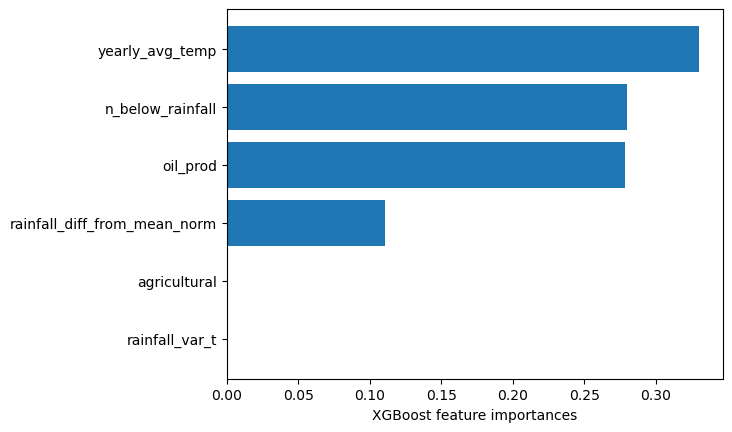

In [26]:
print(grid.best_params_, grid_cv.best_score_)
best_model = grid.best_estimator_.named_steps['xgb']
sorted_idx = best_model.estimator.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], best_model.estimator.feature_importances_[sorted_idx])
plt.xlabel('XGBoost feature importances')
plt.plot()

[0]	validation_0-rmse:0.06723
[1]	validation_0-rmse:0.06727
[2]	validation_0-rmse:0.06731
[3]	validation_0-rmse:0.06732
[4]	validation_0-rmse:0.06733
[5]	validation_0-rmse:0.06732
[6]	validation_0-rmse:0.06736
[7]	validation_0-rmse:0.06737
[8]	validation_0-rmse:0.06738
[9]	validation_0-rmse:0.06740
[0]	validation_0-rmse:0.07915
[1]	validation_0-rmse:0.07905
[2]	validation_0-rmse:0.07895
[3]	validation_0-rmse:0.07892
[4]	validation_0-rmse:0.07888
[5]	validation_0-rmse:0.07889
[6]	validation_0-rmse:0.07890
[7]	validation_0-rmse:0.07885
[8]	validation_0-rmse:0.07884
[9]	validation_0-rmse:0.07883
[0]	validation_0-rmse:0.05344


/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[1]	validation_0-rmse:0.05344
[2]	validation_0-rmse:0.05343
[3]	validation_0-rmse:0.05343
[4]	validation_0-rmse:0.05343
[5]	validation_0-rmse:0.05343
[6]	validation_0-rmse:0.05346
[7]	validation_0-rmse:0.05344
[8]	validation_0-rmse:0.05345
[9]	validation_0-rmse:0.05346
[0]	validation_0-rmse:0.08519
[1]	validation_0-rmse:0.08500
[2]	validation_0-rmse:0.08496
[3]	validation_0-rmse:0.08491
[4]	validation_0-rmse:0.08484
[5]	validation_0-rmse:0.08492
[6]	validation_0-rmse:0.08493
[7]	validation_0-rmse:0.08491
[8]	validation_0-rmse:0.08496
[9]	validation_0-rmse:0.08497
[0]	validation_0-rmse:0.06456
[1]	validation_0-rmse:0.06465
[2]	validation_0-rmse:0.06446
[3]	validation_0-rmse:0.06448
[4]	validation_0-rmse:0.06440
[5]	validation_0-rmse:0.06447
[6]	validation_0-rmse:0.06448
[7]	validation_0-rmse:0.06440
[8]	validation_0-rmse:0.06441
[9]	validation_0-rmse:0.06442
[0]	validation_0-rmse:0.07513
[1]	validation_0-rmse:0.07519
[2]	validation_0-rmse:0.07526
[3]	validation_0-rmse:0.07523
[4]	valida

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[22]	validation_0-rmse:0.07538
[23]	validation_0-rmse:0.07538
[24]	validation_0-rmse:0.07538
[25]	validation_0-rmse:0.07538
[26]	validation_0-rmse:0.07538
[27]	validation_0-rmse:0.07537
[28]	validation_0-rmse:0.07538
[29]	validation_0-rmse:0.07539
[30]	validation_0-rmse:0.07537
[31]	validation_0-rmse:0.07537
[32]	validation_0-rmse:0.07537
[33]	validation_0-rmse:0.07538
[34]	validation_0-rmse:0.07537
[35]	validation_0-rmse:0.07537
[36]	validation_0-rmse:0.07537
[37]	validation_0-rmse:0.07536
[38]	validation_0-rmse:0.07533
[39]	validation_0-rmse:0.07536
[40]	validation_0-rmse:0.07536
[41]	validation_0-rmse:0.07537
[42]	validation_0-rmse:0.07537
[43]	validation_0-rmse:0.07536
[44]	validation_0-rmse:0.07538
[45]	validation_0-rmse:0.07537
[46]	validation_0-rmse:0.07537
[47]	validation_0-rmse:0.07537
[48]	validation_0-rmse:0.07535
[49]	validation_0-rmse:0.07538
[50]	validation_0-rmse:0.07536
[51]	validation_0-rmse:0.07539
[52]	validation_0-rmse:0.07537
[53]	validation_0-rmse:0.07540
[54]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[97]	validation_0-rmse:0.06962
[98]	validation_0-rmse:0.06964
[99]	validation_0-rmse:0.06962
[0]	validation_0-rmse:0.05245
[1]	validation_0-rmse:0.05243
[2]	validation_0-rmse:0.05245
[3]	validation_0-rmse:0.05244
[4]	validation_0-rmse:0.05245
[5]	validation_0-rmse:0.05246
[6]	validation_0-rmse:0.05245
[7]	validation_0-rmse:0.05242
[8]	validation_0-rmse:0.05244
[9]	validation_0-rmse:0.05245
[10]	validation_0-rmse:0.05243
[11]	validation_0-rmse:0.05242
[12]	validation_0-rmse:0.05244
[13]	validation_0-rmse:0.05245
[14]	validation_0-rmse:0.05246
[15]	validation_0-rmse:0.05245
[16]	validation_0-rmse:0.05245
[17]	validation_0-rmse:0.05247
[18]	validation_0-rmse:0.05246
[19]	validation_0-rmse:0.05245
[20]	validation_0-rmse:0.05246
[21]	validation_0-rmse:0.05245
[22]	validation_0-rmse:0.05246
[23]	validation_0-rmse:0.05246
[24]	validation_0-rmse:0.05245
[25]	validation_0-rmse:0.05246
[26]	validation_0-rmse:0.05246
[27]	validation_0-rmse:0.05246
[28]	validation_0-rmse:0.05248
[29]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[99]	validation_0-rmse:0.05254
[0]	validation_0-rmse:0.06399
[1]	validation_0-rmse:0.06379
[2]	validation_0-rmse:0.06379
[3]	validation_0-rmse:0.06373
[4]	validation_0-rmse:0.06363
[5]	validation_0-rmse:0.06363
[6]	validation_0-rmse:0.06359
[7]	validation_0-rmse:0.06354
[8]	validation_0-rmse:0.06352
[9]	validation_0-rmse:0.06352
[10]	validation_0-rmse:0.06354
[11]	validation_0-rmse:0.06350
[12]	validation_0-rmse:0.06350
[13]	validation_0-rmse:0.06352
[14]	validation_0-rmse:0.06350
[15]	validation_0-rmse:0.06348
[16]	validation_0-rmse:0.06348
[17]	validation_0-rmse:0.06346
[18]	validation_0-rmse:0.06348
[19]	validation_0-rmse:0.06345
[20]	validation_0-rmse:0.06344
[21]	validation_0-rmse:0.06344
[22]	validation_0-rmse:0.06346
[23]	validation_0-rmse:0.06344
[24]	validation_0-rmse:0.06343
[25]	validation_0-rmse:0.06345
[26]	validation_0-rmse:0.06344
[27]	validation_0-rmse:0.06346
[28]	validation_0-rmse:0.06347
[29]	validation_0-rmse:0.06346
[30]	validation_0-rmse:0.06345
[31]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[97]	validation_0-rmse:0.06359
[98]	validation_0-rmse:0.06359
[99]	validation_0-rmse:0.06360
[0]	validation_0-rmse:0.06373
[1]	validation_0-rmse:0.06362
[2]	validation_0-rmse:0.06365
[3]	validation_0-rmse:0.06354
[4]	validation_0-rmse:0.06353
[5]	validation_0-rmse:0.06351
[6]	validation_0-rmse:0.06354
[7]	validation_0-rmse:0.06354
[8]	validation_0-rmse:0.06355
[9]	validation_0-rmse:0.06349
[10]	validation_0-rmse:0.06349
[11]	validation_0-rmse:0.06348
[12]	validation_0-rmse:0.06349
[13]	validation_0-rmse:0.06347
[14]	validation_0-rmse:0.06348
[15]	validation_0-rmse:0.06349
[16]	validation_0-rmse:0.06351
[17]	validation_0-rmse:0.06351
[18]	validation_0-rmse:0.06350
[19]	validation_0-rmse:0.06350
[20]	validation_0-rmse:0.06350
[21]	validation_0-rmse:0.06351
[22]	validation_0-rmse:0.06351
[23]	validation_0-rmse:0.06348
[24]	validation_0-rmse:0.06349
[25]	validation_0-rmse:0.06350
[26]	validation_0-rmse:0.06350
[27]	validation_0-rmse:0.06351
[28]	validation_0-rmse:0.06351
[29]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[46]	validation_0-rmse:0.06363
[47]	validation_0-rmse:0.06364
[48]	validation_0-rmse:0.06362
[49]	validation_0-rmse:0.06363
[50]	validation_0-rmse:0.06361
[51]	validation_0-rmse:0.06361
[52]	validation_0-rmse:0.06362
[53]	validation_0-rmse:0.06363
[54]	validation_0-rmse:0.06362
[55]	validation_0-rmse:0.06364
[56]	validation_0-rmse:0.06366
[57]	validation_0-rmse:0.06366
[58]	validation_0-rmse:0.06365
[59]	validation_0-rmse:0.06367
[60]	validation_0-rmse:0.06367
[61]	validation_0-rmse:0.06365
[62]	validation_0-rmse:0.06366
[63]	validation_0-rmse:0.06367
[64]	validation_0-rmse:0.06366
[65]	validation_0-rmse:0.06367
[66]	validation_0-rmse:0.06371
[67]	validation_0-rmse:0.06369
[68]	validation_0-rmse:0.06368
[69]	validation_0-rmse:0.06369
[70]	validation_0-rmse:0.06373
[71]	validation_0-rmse:0.06372
[72]	validation_0-rmse:0.06372
[73]	validation_0-rmse:0.06372
[74]	validation_0-rmse:0.06373
[75]	validation_0-rmse:0.06374
[76]	validation_0-rmse:0.06373
[77]	validation_0-rmse:0.06374
[78]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[83]	validation_0-rmse:0.05576
[84]	validation_0-rmse:0.05575
[85]	validation_0-rmse:0.05576
[86]	validation_0-rmse:0.05576
[87]	validation_0-rmse:0.05576
[88]	validation_0-rmse:0.05576
[89]	validation_0-rmse:0.05575
[90]	validation_0-rmse:0.05576
[91]	validation_0-rmse:0.05576
[92]	validation_0-rmse:0.05576
[93]	validation_0-rmse:0.05576
[94]	validation_0-rmse:0.05576
[95]	validation_0-rmse:0.05577
[96]	validation_0-rmse:0.05577
[97]	validation_0-rmse:0.05577
[98]	validation_0-rmse:0.05577
[99]	validation_0-rmse:0.05578
[100]	validation_0-rmse:0.05577
[101]	validation_0-rmse:0.05577
[102]	validation_0-rmse:0.05577
[103]	validation_0-rmse:0.05577
[104]	validation_0-rmse:0.05578
[105]	validation_0-rmse:0.05577
[106]	validation_0-rmse:0.05578
[107]	validation_0-rmse:0.05578
[108]	validation_0-rmse:0.05578
[109]	validation_0-rmse:0.05578
[110]	validation_0-rmse:0.05578
[111]	validation_0-rmse:0.05578
[112]	validation_0-rmse:0.05578
[113]	validation_0-rmse:0.05578
[114]	validation_0-rmse:0

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[51]	validation_0-rmse:0.06300
[52]	validation_0-rmse:0.06301
[53]	validation_0-rmse:0.06304
[54]	validation_0-rmse:0.06301
[55]	validation_0-rmse:0.06305
[56]	validation_0-rmse:0.06305
[57]	validation_0-rmse:0.06305
[58]	validation_0-rmse:0.06302
[59]	validation_0-rmse:0.06304
[60]	validation_0-rmse:0.06303
[61]	validation_0-rmse:0.06305
[62]	validation_0-rmse:0.06307
[63]	validation_0-rmse:0.06305
[64]	validation_0-rmse:0.06309
[65]	validation_0-rmse:0.06308
[66]	validation_0-rmse:0.06306
[67]	validation_0-rmse:0.06308
[68]	validation_0-rmse:0.06308
[69]	validation_0-rmse:0.06308
[70]	validation_0-rmse:0.06308
[71]	validation_0-rmse:0.06308
[72]	validation_0-rmse:0.06307
[73]	validation_0-rmse:0.06309
[74]	validation_0-rmse:0.06307
[75]	validation_0-rmse:0.06308
[76]	validation_0-rmse:0.06307
[77]	validation_0-rmse:0.06308
[78]	validation_0-rmse:0.06309
[79]	validation_0-rmse:0.06306
[80]	validation_0-rmse:0.06308
[81]	validation_0-rmse:0.06306
[82]	validation_0-rmse:0.06306
[83]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[86]	validation_0-rmse:0.05186
[87]	validation_0-rmse:0.05187
[88]	validation_0-rmse:0.05186
[89]	validation_0-rmse:0.05186
[90]	validation_0-rmse:0.05186
[91]	validation_0-rmse:0.05187
[92]	validation_0-rmse:0.05186
[93]	validation_0-rmse:0.05186
[94]	validation_0-rmse:0.05186
[95]	validation_0-rmse:0.05187
[96]	validation_0-rmse:0.05186
[97]	validation_0-rmse:0.05186
[98]	validation_0-rmse:0.05186
[99]	validation_0-rmse:0.05187
[100]	validation_0-rmse:0.05187
[101]	validation_0-rmse:0.05188
[102]	validation_0-rmse:0.05187
[103]	validation_0-rmse:0.05188
[104]	validation_0-rmse:0.05188
[105]	validation_0-rmse:0.05188
[106]	validation_0-rmse:0.05188
[107]	validation_0-rmse:0.05188
[108]	validation_0-rmse:0.05188
[109]	validation_0-rmse:0.05189
[110]	validation_0-rmse:0.05189
[111]	validation_0-rmse:0.05189
[112]	validation_0-rmse:0.05189
[113]	validation_0-rmse:0.05189
[114]	validation_0-rmse:0.05189
[115]	validation_0-rmse:0.05190
[116]	validation_0-rmse:0.05189
[117]	validation_0-rms

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[23]	validation_0-rmse:0.05435
[24]	validation_0-rmse:0.05434
[25]	validation_0-rmse:0.05436
[26]	validation_0-rmse:0.05435
[27]	validation_0-rmse:0.05437
[28]	validation_0-rmse:0.05434
[29]	validation_0-rmse:0.05433
[30]	validation_0-rmse:0.05429
[31]	validation_0-rmse:0.05431
[32]	validation_0-rmse:0.05430
[33]	validation_0-rmse:0.05429
[34]	validation_0-rmse:0.05429
[35]	validation_0-rmse:0.05432
[36]	validation_0-rmse:0.05431
[37]	validation_0-rmse:0.05432
[38]	validation_0-rmse:0.05432
[39]	validation_0-rmse:0.05433
[40]	validation_0-rmse:0.05432
[41]	validation_0-rmse:0.05432
[42]	validation_0-rmse:0.05432
[43]	validation_0-rmse:0.05432
[44]	validation_0-rmse:0.05430
[45]	validation_0-rmse:0.05432
[46]	validation_0-rmse:0.05430
[47]	validation_0-rmse:0.05431
[48]	validation_0-rmse:0.05432
[49]	validation_0-rmse:0.05432
[50]	validation_0-rmse:0.05431
[51]	validation_0-rmse:0.05430
[52]	validation_0-rmse:0.05432
[53]	validation_0-rmse:0.05433
[54]	validation_0-rmse:0.05432
[55]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[56]	validation_0-rmse:0.06066
[57]	validation_0-rmse:0.06068
[58]	validation_0-rmse:0.06068
[59]	validation_0-rmse:0.06069
[60]	validation_0-rmse:0.06068
[61]	validation_0-rmse:0.06068
[62]	validation_0-rmse:0.06069
[63]	validation_0-rmse:0.06068
[64]	validation_0-rmse:0.06069
[65]	validation_0-rmse:0.06069
[66]	validation_0-rmse:0.06071
[67]	validation_0-rmse:0.06072
[68]	validation_0-rmse:0.06072
[69]	validation_0-rmse:0.06072
[70]	validation_0-rmse:0.06072
[71]	validation_0-rmse:0.06072
[72]	validation_0-rmse:0.06073
[73]	validation_0-rmse:0.06073
[74]	validation_0-rmse:0.06074
[75]	validation_0-rmse:0.06075
[76]	validation_0-rmse:0.06076
[77]	validation_0-rmse:0.06075
[78]	validation_0-rmse:0.06076
[79]	validation_0-rmse:0.06080
[80]	validation_0-rmse:0.06080
[81]	validation_0-rmse:0.06082
[82]	validation_0-rmse:0.06082
[83]	validation_0-rmse:0.06081
[84]	validation_0-rmse:0.06081
[85]	validation_0-rmse:0.06082
[86]	validation_0-rmse:0.06081
[87]	validation_0-rmse:0.06082
[88]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[2]	validation_0-rmse:0.06364
[3]	validation_0-rmse:0.06363
[4]	validation_0-rmse:0.06361
[5]	validation_0-rmse:0.06362
[6]	validation_0-rmse:0.06362
[7]	validation_0-rmse:0.06362
[8]	validation_0-rmse:0.06365
[9]	validation_0-rmse:0.06369
[0]	validation_0-rmse:0.07378
[1]	validation_0-rmse:0.07392
[2]	validation_0-rmse:0.07399
[3]	validation_0-rmse:0.07400
[4]	validation_0-rmse:0.07401
[5]	validation_0-rmse:0.07402
[6]	validation_0-rmse:0.07404
[7]	validation_0-rmse:0.07403
[8]	validation_0-rmse:0.07438
[9]	validation_0-rmse:0.07442
[0]	validation_0-rmse:0.06904
[1]	validation_0-rmse:0.06901
[2]	validation_0-rmse:0.06906
[3]	validation_0-rmse:0.06910
[4]	validation_0-rmse:0.06912
[5]	validation_0-rmse:0.06926
[6]	validation_0-rmse:0.06925
[7]	validation_0-rmse:0.06922
[8]	validation_0-rmse:0.06932
[9]	validation_0-rmse:0.06934
[0]	validation_0-rmse:0.06826
[1]	validation_0-rmse:0.06839
[2]	validation_0-rmse:0.06843
[3]	validation_0-rmse:0.06836
[4]	validation_0-rmse:0.06841
[5]	valida

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[16]	validation_0-rmse:0.06876
[17]	validation_0-rmse:0.06882
[18]	validation_0-rmse:0.06882
[19]	validation_0-rmse:0.06887
[20]	validation_0-rmse:0.06892
[21]	validation_0-rmse:0.06895
[22]	validation_0-rmse:0.06889
[23]	validation_0-rmse:0.06896
[24]	validation_0-rmse:0.06908
[25]	validation_0-rmse:0.06914
[26]	validation_0-rmse:0.06918
[27]	validation_0-rmse:0.06926
[28]	validation_0-rmse:0.06926
[29]	validation_0-rmse:0.06923
[30]	validation_0-rmse:0.06924
[31]	validation_0-rmse:0.06930
[32]	validation_0-rmse:0.06933
[33]	validation_0-rmse:0.06934
[34]	validation_0-rmse:0.06933
[35]	validation_0-rmse:0.06936
[36]	validation_0-rmse:0.06932
[37]	validation_0-rmse:0.06931
[38]	validation_0-rmse:0.06933
[39]	validation_0-rmse:0.06931
[40]	validation_0-rmse:0.06930
[41]	validation_0-rmse:0.06933
[42]	validation_0-rmse:0.06934
[43]	validation_0-rmse:0.06934
[44]	validation_0-rmse:0.06931
[45]	validation_0-rmse:0.06933
[46]	validation_0-rmse:0.06938
[47]	validation_0-rmse:0.06935
[48]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[73]	validation_0-rmse:0.07836
[74]	validation_0-rmse:0.07841
[75]	validation_0-rmse:0.07842
[76]	validation_0-rmse:0.07842
[77]	validation_0-rmse:0.07841
[78]	validation_0-rmse:0.07841
[79]	validation_0-rmse:0.07844
[80]	validation_0-rmse:0.07846
[81]	validation_0-rmse:0.07850
[82]	validation_0-rmse:0.07850
[83]	validation_0-rmse:0.07857
[84]	validation_0-rmse:0.07857
[85]	validation_0-rmse:0.07857
[86]	validation_0-rmse:0.07859
[87]	validation_0-rmse:0.07859
[88]	validation_0-rmse:0.07855
[89]	validation_0-rmse:0.07861
[90]	validation_0-rmse:0.07861
[91]	validation_0-rmse:0.07862
[92]	validation_0-rmse:0.07860
[93]	validation_0-rmse:0.07861
[94]	validation_0-rmse:0.07867
[95]	validation_0-rmse:0.07881
[96]	validation_0-rmse:0.07880
[97]	validation_0-rmse:0.07886
[98]	validation_0-rmse:0.07888
[99]	validation_0-rmse:0.07888
[0]	validation_0-rmse:0.05584
[1]	validation_0-rmse:0.05585
[2]	validation_0-rmse:0.05581
[3]	validation_0-rmse:0.05588
[4]	validation_0-rmse:0.05599
[5]	validatio

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[78]	validation_0-rmse:0.05755
[79]	validation_0-rmse:0.05750
[80]	validation_0-rmse:0.05756
[81]	validation_0-rmse:0.05756
[82]	validation_0-rmse:0.05760
[83]	validation_0-rmse:0.05758
[84]	validation_0-rmse:0.05756
[85]	validation_0-rmse:0.05760
[86]	validation_0-rmse:0.05749
[87]	validation_0-rmse:0.05749
[88]	validation_0-rmse:0.05752
[89]	validation_0-rmse:0.05752
[90]	validation_0-rmse:0.05756
[91]	validation_0-rmse:0.05759
[92]	validation_0-rmse:0.05762
[93]	validation_0-rmse:0.05761
[94]	validation_0-rmse:0.05764
[95]	validation_0-rmse:0.05764
[96]	validation_0-rmse:0.05765
[97]	validation_0-rmse:0.05765
[98]	validation_0-rmse:0.05772
[99]	validation_0-rmse:0.05775
[0]	validation_0-rmse:0.07150
[1]	validation_0-rmse:0.07133
[2]	validation_0-rmse:0.07134
[3]	validation_0-rmse:0.07115
[4]	validation_0-rmse:0.07107
[5]	validation_0-rmse:0.07093
[6]	validation_0-rmse:0.07099
[7]	validation_0-rmse:0.07090
[8]	validation_0-rmse:0.07085
[9]	validation_0-rmse:0.07085
[10]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[91]	validation_0-rmse:0.07157
[92]	validation_0-rmse:0.07160
[93]	validation_0-rmse:0.07160
[94]	validation_0-rmse:0.07158
[95]	validation_0-rmse:0.07158
[96]	validation_0-rmse:0.07156
[97]	validation_0-rmse:0.07154
[98]	validation_0-rmse:0.07154
[99]	validation_0-rmse:0.07154
[0]	validation_0-rmse:0.06603
[1]	validation_0-rmse:0.06609
[2]	validation_0-rmse:0.06610
[3]	validation_0-rmse:0.06613
[4]	validation_0-rmse:0.06614
[5]	validation_0-rmse:0.06618
[6]	validation_0-rmse:0.06620
[7]	validation_0-rmse:0.06684
[8]	validation_0-rmse:0.06683
[9]	validation_0-rmse:0.06684
[10]	validation_0-rmse:0.06722
[11]	validation_0-rmse:0.06729
[12]	validation_0-rmse:0.06730
[13]	validation_0-rmse:0.06731
[14]	validation_0-rmse:0.06735
[15]	validation_0-rmse:0.06792
[16]	validation_0-rmse:0.06786
[17]	validation_0-rmse:0.06792
[18]	validation_0-rmse:0.06796
[19]	validation_0-rmse:0.06796
[20]	validation_0-rmse:0.06808
[21]	validation_0-rmse:0.06806
[22]	validation_0-rmse:0.06807
[23]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[82]	validation_0-rmse:0.07071
[83]	validation_0-rmse:0.07071
[84]	validation_0-rmse:0.07068
[85]	validation_0-rmse:0.07073
[86]	validation_0-rmse:0.07074
[87]	validation_0-rmse:0.07074
[88]	validation_0-rmse:0.07071
[89]	validation_0-rmse:0.07077
[90]	validation_0-rmse:0.07078
[91]	validation_0-rmse:0.07078
[92]	validation_0-rmse:0.07077
[93]	validation_0-rmse:0.07080
[94]	validation_0-rmse:0.07089
[95]	validation_0-rmse:0.07090
[96]	validation_0-rmse:0.07098
[97]	validation_0-rmse:0.07107
[98]	validation_0-rmse:0.07123
[99]	validation_0-rmse:0.07124
[0]	validation_0-rmse:0.05781
[1]	validation_0-rmse:0.05796
[2]	validation_0-rmse:0.05803
[3]	validation_0-rmse:0.05810
[4]	validation_0-rmse:0.05818
[5]	validation_0-rmse:0.05818
[6]	validation_0-rmse:0.05825
[7]	validation_0-rmse:0.05825
[8]	validation_0-rmse:0.05829
[9]	validation_0-rmse:0.05838
[10]	validation_0-rmse:0.05840
[11]	validation_0-rmse:0.05838
[12]	validation_0-rmse:0.05841
[13]	validation_0-rmse:0.05841
[14]	validation_0-

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[69]	validation_0-rmse:0.05987
[70]	validation_0-rmse:0.05987
[71]	validation_0-rmse:0.05991
[72]	validation_0-rmse:0.05991
[73]	validation_0-rmse:0.05996
[74]	validation_0-rmse:0.05997
[75]	validation_0-rmse:0.05994
[76]	validation_0-rmse:0.05994
[77]	validation_0-rmse:0.06003
[78]	validation_0-rmse:0.06002
[79]	validation_0-rmse:0.06006
[80]	validation_0-rmse:0.06008
[81]	validation_0-rmse:0.06011
[82]	validation_0-rmse:0.06016
[83]	validation_0-rmse:0.06012
[84]	validation_0-rmse:0.06015
[85]	validation_0-rmse:0.06017
[86]	validation_0-rmse:0.06018
[87]	validation_0-rmse:0.06015
[88]	validation_0-rmse:0.06020
[89]	validation_0-rmse:0.06062
[90]	validation_0-rmse:0.06060
[91]	validation_0-rmse:0.06062
[92]	validation_0-rmse:0.06059
[93]	validation_0-rmse:0.06059
[94]	validation_0-rmse:0.06058
[95]	validation_0-rmse:0.06061
[96]	validation_0-rmse:0.06063
[97]	validation_0-rmse:0.06064
[98]	validation_0-rmse:0.06069
[99]	validation_0-rmse:0.06075
[100]	validation_0-rmse:0.06076
[101]	v

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[81]	validation_0-rmse:0.05781
[82]	validation_0-rmse:0.05778
[83]	validation_0-rmse:0.05778
[84]	validation_0-rmse:0.05780
[85]	validation_0-rmse:0.05781
[86]	validation_0-rmse:0.05781
[87]	validation_0-rmse:0.05784
[88]	validation_0-rmse:0.05785
[89]	validation_0-rmse:0.05790
[90]	validation_0-rmse:0.05793
[91]	validation_0-rmse:0.05797
[92]	validation_0-rmse:0.05797
[93]	validation_0-rmse:0.05799
[94]	validation_0-rmse:0.05798
[95]	validation_0-rmse:0.05799
[96]	validation_0-rmse:0.05798
[97]	validation_0-rmse:0.05800
[98]	validation_0-rmse:0.05807
[99]	validation_0-rmse:0.05812
[100]	validation_0-rmse:0.05818
[101]	validation_0-rmse:0.05820
[102]	validation_0-rmse:0.05821
[103]	validation_0-rmse:0.05821
[104]	validation_0-rmse:0.05825
[105]	validation_0-rmse:0.05862
[106]	validation_0-rmse:0.05862
[107]	validation_0-rmse:0.05944
[108]	validation_0-rmse:0.05945
[109]	validation_0-rmse:0.05952
[110]	validation_0-rmse:0.05952
[111]	validation_0-rmse:0.05956
[112]	validation_0-rmse:0.0

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[72]	validation_0-rmse:0.07308
[73]	validation_0-rmse:0.07308
[74]	validation_0-rmse:0.07309
[75]	validation_0-rmse:0.07310
[76]	validation_0-rmse:0.07317
[77]	validation_0-rmse:0.07309
[78]	validation_0-rmse:0.07309
[79]	validation_0-rmse:0.07310
[80]	validation_0-rmse:0.07310
[81]	validation_0-rmse:0.07310
[82]	validation_0-rmse:0.07310
[83]	validation_0-rmse:0.07311
[84]	validation_0-rmse:0.07313
[85]	validation_0-rmse:0.07311
[86]	validation_0-rmse:0.07322
[87]	validation_0-rmse:0.07322
[88]	validation_0-rmse:0.07326
[89]	validation_0-rmse:0.07376
[90]	validation_0-rmse:0.07374
[91]	validation_0-rmse:0.07373
[92]	validation_0-rmse:0.07372
[93]	validation_0-rmse:0.07378
[94]	validation_0-rmse:0.07376
[95]	validation_0-rmse:0.07379
[96]	validation_0-rmse:0.07380
[97]	validation_0-rmse:0.07380
[98]	validation_0-rmse:0.07380
[99]	validation_0-rmse:0.07383
[100]	validation_0-rmse:0.07383
[101]	validation_0-rmse:0.07378
[102]	validation_0-rmse:0.07379
[103]	validation_0-rmse:0.07382
[104

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[78]	validation_0-rmse:0.07204
[79]	validation_0-rmse:0.07223
[80]	validation_0-rmse:0.07225
[81]	validation_0-rmse:0.07244
[82]	validation_0-rmse:0.07246
[83]	validation_0-rmse:0.07245
[84]	validation_0-rmse:0.07248
[85]	validation_0-rmse:0.07250
[86]	validation_0-rmse:0.07259
[87]	validation_0-rmse:0.07273
[88]	validation_0-rmse:0.07272
[89]	validation_0-rmse:0.07273
[90]	validation_0-rmse:0.07275
[91]	validation_0-rmse:0.07279
[92]	validation_0-rmse:0.07281
[93]	validation_0-rmse:0.07283
[94]	validation_0-rmse:0.07286
[95]	validation_0-rmse:0.07287
[96]	validation_0-rmse:0.07288
[97]	validation_0-rmse:0.07290
[98]	validation_0-rmse:0.07304
[99]	validation_0-rmse:0.07304
[100]	validation_0-rmse:0.07311
[101]	validation_0-rmse:0.07310
[102]	validation_0-rmse:0.07313
[103]	validation_0-rmse:0.07313
[104]	validation_0-rmse:0.07312
[105]	validation_0-rmse:0.07312
[106]	validation_0-rmse:0.07312
[107]	validation_0-rmse:0.07312
[108]	validation_0-rmse:0.07324
[109]	validation_0-rmse:0.0732

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[59]	validation_0-rmse:0.06294
[60]	validation_0-rmse:0.06297
[61]	validation_0-rmse:0.06297
[62]	validation_0-rmse:0.06298
[63]	validation_0-rmse:0.06302
[64]	validation_0-rmse:0.06321
[65]	validation_0-rmse:0.06321
[66]	validation_0-rmse:0.06320
[67]	validation_0-rmse:0.06319
[68]	validation_0-rmse:0.06320
[69]	validation_0-rmse:0.06327
[70]	validation_0-rmse:0.06331
[71]	validation_0-rmse:0.06336
[72]	validation_0-rmse:0.06356
[73]	validation_0-rmse:0.06353
[74]	validation_0-rmse:0.06357
[75]	validation_0-rmse:0.06352
[76]	validation_0-rmse:0.06354
[77]	validation_0-rmse:0.06357
[78]	validation_0-rmse:0.06354
[79]	validation_0-rmse:0.06347
[80]	validation_0-rmse:0.06347
[81]	validation_0-rmse:0.06345
[82]	validation_0-rmse:0.06344
[83]	validation_0-rmse:0.06346
[84]	validation_0-rmse:0.06344
[85]	validation_0-rmse:0.06345
[86]	validation_0-rmse:0.06350
[87]	validation_0-rmse:0.06355
[88]	validation_0-rmse:0.06356
[89]	validation_0-rmse:0.06350
[90]	validation_0-rmse:0.06353
[91]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[0]	validation_0-rmse:0.05194
[1]	validation_0-rmse:0.05217
[2]	validation_0-rmse:0.05218
[3]	validation_0-rmse:0.05221
[4]	validation_0-rmse:0.05238
[5]	validation_0-rmse:0.05241
[6]	validation_0-rmse:0.05266
[7]	validation_0-rmse:0.05269
[8]	validation_0-rmse:0.05274
[9]	validation_0-rmse:0.05281
[0]	validation_0-rmse:0.05801
[1]	validation_0-rmse:0.05805
[2]	validation_0-rmse:0.05788
[3]	validation_0-rmse:0.05794
[4]	validation_0-rmse:0.05799
[5]	validation_0-rmse:0.05805
[6]	validation_0-rmse:0.05807
[7]	validation_0-rmse:0.05812
[8]	validation_0-rmse:0.05816
[9]	validation_0-rmse:0.05814
[0]	validation_0-rmse:0.06429
[1]	validation_0-rmse:0.06458
[2]	validation_0-rmse:0.06469
[3]	validation_0-rmse:0.06516
[4]	validation_0-rmse:0.06523
[5]	validation_0-rmse:0.06543
[6]	validation_0-rmse:0.06568
[7]	validation_0-rmse:0.06574
[8]	validation_0-rmse:0.06581
[9]	validation_0-rmse:0.06584
[0]	validation_0-rmse:0.06721
[1]	validation_0-rmse:0.06716
[2]	validation_0-rmse:0.06721
[3]	valida

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[28]	validation_0-rmse:0.06752
[29]	validation_0-rmse:0.06735
[30]	validation_0-rmse:0.06736
[31]	validation_0-rmse:0.06737
[32]	validation_0-rmse:0.06737
[33]	validation_0-rmse:0.06739
[34]	validation_0-rmse:0.06748
[35]	validation_0-rmse:0.06755
[36]	validation_0-rmse:0.06762
[37]	validation_0-rmse:0.06772
[38]	validation_0-rmse:0.06780
[39]	validation_0-rmse:0.06798
[40]	validation_0-rmse:0.06807
[41]	validation_0-rmse:0.06812
[42]	validation_0-rmse:0.06823
[43]	validation_0-rmse:0.06821
[44]	validation_0-rmse:0.06819
[45]	validation_0-rmse:0.06824
[46]	validation_0-rmse:0.06830
[47]	validation_0-rmse:0.06835
[48]	validation_0-rmse:0.06833
[49]	validation_0-rmse:0.06837
[50]	validation_0-rmse:0.06847
[51]	validation_0-rmse:0.06866
[52]	validation_0-rmse:0.06879
[53]	validation_0-rmse:0.06879
[54]	validation_0-rmse:0.06891
[55]	validation_0-rmse:0.06906
[56]	validation_0-rmse:0.06908
[57]	validation_0-rmse:0.06921
[58]	validation_0-rmse:0.06943
[59]	validation_0-rmse:0.06952
[60]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[63]	validation_0-rmse:0.07897
[64]	validation_0-rmse:0.07905
[65]	validation_0-rmse:0.07904
[66]	validation_0-rmse:0.07903
[67]	validation_0-rmse:0.07902
[68]	validation_0-rmse:0.07903
[69]	validation_0-rmse:0.07899
[70]	validation_0-rmse:0.07902
[71]	validation_0-rmse:0.07922
[72]	validation_0-rmse:0.07925
[73]	validation_0-rmse:0.07926
[74]	validation_0-rmse:0.07929
[75]	validation_0-rmse:0.07927
[76]	validation_0-rmse:0.07924
[77]	validation_0-rmse:0.07929
[78]	validation_0-rmse:0.07936
[79]	validation_0-rmse:0.07935
[80]	validation_0-rmse:0.07935
[81]	validation_0-rmse:0.07935
[82]	validation_0-rmse:0.07940
[83]	validation_0-rmse:0.07954
[84]	validation_0-rmse:0.07958
[85]	validation_0-rmse:0.07961
[86]	validation_0-rmse:0.07964
[87]	validation_0-rmse:0.07967
[88]	validation_0-rmse:0.08049
[89]	validation_0-rmse:0.08062
[90]	validation_0-rmse:0.08061
[91]	validation_0-rmse:0.08083
[92]	validation_0-rmse:0.08083
[93]	validation_0-rmse:0.08081
[94]	validation_0-rmse:0.08083
[95]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[60]	validation_0-rmse:0.06930
[61]	validation_0-rmse:0.06932
[62]	validation_0-rmse:0.06930
[63]	validation_0-rmse:0.06930
[64]	validation_0-rmse:0.06930
[65]	validation_0-rmse:0.06937
[66]	validation_0-rmse:0.06939
[67]	validation_0-rmse:0.06949
[68]	validation_0-rmse:0.06951
[69]	validation_0-rmse:0.06960
[70]	validation_0-rmse:0.06958
[71]	validation_0-rmse:0.06966
[72]	validation_0-rmse:0.06973
[73]	validation_0-rmse:0.06983
[74]	validation_0-rmse:0.06978
[75]	validation_0-rmse:0.06981
[76]	validation_0-rmse:0.06988
[77]	validation_0-rmse:0.06995
[78]	validation_0-rmse:0.06995
[79]	validation_0-rmse:0.06995
[80]	validation_0-rmse:0.07002
[81]	validation_0-rmse:0.07005
[82]	validation_0-rmse:0.07003
[83]	validation_0-rmse:0.07009
[84]	validation_0-rmse:0.07015
[85]	validation_0-rmse:0.07020
[86]	validation_0-rmse:0.07017
[87]	validation_0-rmse:0.07016
[88]	validation_0-rmse:0.07019
[89]	validation_0-rmse:0.07038
[90]	validation_0-rmse:0.07041
[91]	validation_0-rmse:0.07047
[92]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[63]	validation_0-rmse:0.07022
[64]	validation_0-rmse:0.07023
[65]	validation_0-rmse:0.07051
[66]	validation_0-rmse:0.07055
[67]	validation_0-rmse:0.07060
[68]	validation_0-rmse:0.07063
[69]	validation_0-rmse:0.07086
[70]	validation_0-rmse:0.07087
[71]	validation_0-rmse:0.07087
[72]	validation_0-rmse:0.07089
[73]	validation_0-rmse:0.07086
[74]	validation_0-rmse:0.07087
[75]	validation_0-rmse:0.07088
[76]	validation_0-rmse:0.07089
[77]	validation_0-rmse:0.07092
[78]	validation_0-rmse:0.07099
[79]	validation_0-rmse:0.07099
[80]	validation_0-rmse:0.07101
[81]	validation_0-rmse:0.07113
[82]	validation_0-rmse:0.07110
[83]	validation_0-rmse:0.07111
[84]	validation_0-rmse:0.07115
[85]	validation_0-rmse:0.07110
[86]	validation_0-rmse:0.07109
[87]	validation_0-rmse:0.07111
[88]	validation_0-rmse:0.07102
[89]	validation_0-rmse:0.07099
[90]	validation_0-rmse:0.07099
[91]	validation_0-rmse:0.07093
[92]	validation_0-rmse:0.07093
[93]	validation_0-rmse:0.07094
[94]	validation_0-rmse:0.07093
[95]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[34]	validation_0-rmse:0.05977
[35]	validation_0-rmse:0.05982
[36]	validation_0-rmse:0.05986
[37]	validation_0-rmse:0.05986
[38]	validation_0-rmse:0.05983
[39]	validation_0-rmse:0.05984
[40]	validation_0-rmse:0.05986
[41]	validation_0-rmse:0.05988
[42]	validation_0-rmse:0.05999
[43]	validation_0-rmse:0.05998
[44]	validation_0-rmse:0.06001
[45]	validation_0-rmse:0.06012
[46]	validation_0-rmse:0.06008
[47]	validation_0-rmse:0.06006
[48]	validation_0-rmse:0.06012
[49]	validation_0-rmse:0.06011
[50]	validation_0-rmse:0.06016
[51]	validation_0-rmse:0.06027
[52]	validation_0-rmse:0.06031
[53]	validation_0-rmse:0.06041
[54]	validation_0-rmse:0.06045
[55]	validation_0-rmse:0.06046
[56]	validation_0-rmse:0.06057
[57]	validation_0-rmse:0.06060
[58]	validation_0-rmse:0.06064
[59]	validation_0-rmse:0.06116
[60]	validation_0-rmse:0.06115
[61]	validation_0-rmse:0.06116
[62]	validation_0-rmse:0.06113
[63]	validation_0-rmse:0.06113
[64]	validation_0-rmse:0.06118
[65]	validation_0-rmse:0.06115
[66]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[66]	validation_0-rmse:0.06867
[67]	validation_0-rmse:0.06867
[68]	validation_0-rmse:0.06869
[69]	validation_0-rmse:0.06881
[70]	validation_0-rmse:0.06882
[71]	validation_0-rmse:0.06887
[72]	validation_0-rmse:0.06892
[73]	validation_0-rmse:0.06896
[74]	validation_0-rmse:0.06901
[75]	validation_0-rmse:0.06925
[76]	validation_0-rmse:0.06925
[77]	validation_0-rmse:0.06928
[78]	validation_0-rmse:0.06936
[79]	validation_0-rmse:0.06941
[80]	validation_0-rmse:0.06946
[81]	validation_0-rmse:0.06969
[82]	validation_0-rmse:0.06968
[83]	validation_0-rmse:0.06974
[84]	validation_0-rmse:0.06971
[85]	validation_0-rmse:0.06977
[86]	validation_0-rmse:0.06976
[87]	validation_0-rmse:0.06979
[88]	validation_0-rmse:0.06980
[89]	validation_0-rmse:0.06981
[90]	validation_0-rmse:0.06986
[91]	validation_0-rmse:0.06986
[92]	validation_0-rmse:0.06997
[93]	validation_0-rmse:0.06998
[94]	validation_0-rmse:0.06996
[95]	validation_0-rmse:0.06996
[96]	validation_0-rmse:0.06994
[97]	validation_0-rmse:0.06993
[98]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[67]	validation_0-rmse:0.07709
[68]	validation_0-rmse:0.07711
[69]	validation_0-rmse:0.07713
[70]	validation_0-rmse:0.07718
[71]	validation_0-rmse:0.07718
[72]	validation_0-rmse:0.07722
[73]	validation_0-rmse:0.07748
[74]	validation_0-rmse:0.07757
[75]	validation_0-rmse:0.07763
[76]	validation_0-rmse:0.07760
[77]	validation_0-rmse:0.07763
[78]	validation_0-rmse:0.07800
[79]	validation_0-rmse:0.07821
[80]	validation_0-rmse:0.07821
[81]	validation_0-rmse:0.07822
[82]	validation_0-rmse:0.07823
[83]	validation_0-rmse:0.07829
[84]	validation_0-rmse:0.07830
[85]	validation_0-rmse:0.07861
[86]	validation_0-rmse:0.07866
[87]	validation_0-rmse:0.07877
[88]	validation_0-rmse:0.07883
[89]	validation_0-rmse:0.07887
[90]	validation_0-rmse:0.07895
[91]	validation_0-rmse:0.07895
[92]	validation_0-rmse:0.07897
[93]	validation_0-rmse:0.07892
[94]	validation_0-rmse:0.07895
[95]	validation_0-rmse:0.07899
[96]	validation_0-rmse:0.07900
[97]	validation_0-rmse:0.07933
[98]	validation_0-rmse:0.07963
[99]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[76]	validation_0-rmse:0.05869
[77]	validation_0-rmse:0.05875
[78]	validation_0-rmse:0.05880
[79]	validation_0-rmse:0.05888
[80]	validation_0-rmse:0.05888
[81]	validation_0-rmse:0.05898
[82]	validation_0-rmse:0.05913
[83]	validation_0-rmse:0.05912
[84]	validation_0-rmse:0.05907
[85]	validation_0-rmse:0.05910
[86]	validation_0-rmse:0.05913
[87]	validation_0-rmse:0.05914
[88]	validation_0-rmse:0.05914
[89]	validation_0-rmse:0.05911
[90]	validation_0-rmse:0.05931
[91]	validation_0-rmse:0.05929
[92]	validation_0-rmse:0.05928
[93]	validation_0-rmse:0.05925
[94]	validation_0-rmse:0.05921
[95]	validation_0-rmse:0.05934
[96]	validation_0-rmse:0.05936
[97]	validation_0-rmse:0.05941
[98]	validation_0-rmse:0.05959
[99]	validation_0-rmse:0.05960
[100]	validation_0-rmse:0.05958
[101]	validation_0-rmse:0.06006
[102]	validation_0-rmse:0.06007
[103]	validation_0-rmse:0.06005
[104]	validation_0-rmse:0.06005
[105]	validation_0-rmse:0.06008
[106]	validation_0-rmse:0.06013
[107]	validation_0-rmse:0.06013


/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[45]	validation_0-rmse:0.07273
[46]	validation_0-rmse:0.07278
[47]	validation_0-rmse:0.07288
[48]	validation_0-rmse:0.07292
[49]	validation_0-rmse:0.07298
[50]	validation_0-rmse:0.07299
[51]	validation_0-rmse:0.07306
[52]	validation_0-rmse:0.07310
[53]	validation_0-rmse:0.07314
[54]	validation_0-rmse:0.07308
[55]	validation_0-rmse:0.07308
[56]	validation_0-rmse:0.07309
[57]	validation_0-rmse:0.07311
[58]	validation_0-rmse:0.07310
[59]	validation_0-rmse:0.07314
[60]	validation_0-rmse:0.07319
[61]	validation_0-rmse:0.07328
[62]	validation_0-rmse:0.07333
[63]	validation_0-rmse:0.07333
[64]	validation_0-rmse:0.07340
[65]	validation_0-rmse:0.07341
[66]	validation_0-rmse:0.07343
[67]	validation_0-rmse:0.07347
[68]	validation_0-rmse:0.07349
[69]	validation_0-rmse:0.07349
[70]	validation_0-rmse:0.07361
[71]	validation_0-rmse:0.07363
[72]	validation_0-rmse:0.07367
[73]	validation_0-rmse:0.07368
[74]	validation_0-rmse:0.07375
[75]	validation_0-rmse:0.07414
[76]	validation_0-rmse:0.07415
[77]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[51]	validation_0-rmse:0.07810
[52]	validation_0-rmse:0.07816
[53]	validation_0-rmse:0.07823
[54]	validation_0-rmse:0.07811
[55]	validation_0-rmse:0.07817
[56]	validation_0-rmse:0.07815
[57]	validation_0-rmse:0.07818
[58]	validation_0-rmse:0.07820
[59]	validation_0-rmse:0.07848
[60]	validation_0-rmse:0.07849
[61]	validation_0-rmse:0.07848
[62]	validation_0-rmse:0.07846
[63]	validation_0-rmse:0.07848
[64]	validation_0-rmse:0.07855
[65]	validation_0-rmse:0.07855
[66]	validation_0-rmse:0.07857
[67]	validation_0-rmse:0.07860
[68]	validation_0-rmse:0.07864
[69]	validation_0-rmse:0.07873
[70]	validation_0-rmse:0.07870
[71]	validation_0-rmse:0.07876
[72]	validation_0-rmse:0.07890
[73]	validation_0-rmse:0.07894
[74]	validation_0-rmse:0.07895
[75]	validation_0-rmse:0.07895
[76]	validation_0-rmse:0.07892
[77]	validation_0-rmse:0.07893
[78]	validation_0-rmse:0.07891
[79]	validation_0-rmse:0.07892
[80]	validation_0-rmse:0.07895
[81]	validation_0-rmse:0.07899
[82]	validation_0-rmse:0.07901
[83]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 

[0]	validation_0-rmse:0.05749
[1]	validation_0-rmse:0.05832
[2]	validation_0-rmse:0.05942
[3]	validation_0-rmse:0.06015
[4]	validation_0-rmse:0.06036
[5]	validation_0-rmse:0.06161
[6]	validation_0-rmse:0.06198
[7]	validation_0-rmse:0.06211
[8]	validation_0-rmse:0.06253
[9]	validation_0-rmse:0.06287
[0]	validation_0-rmse:0.06405
[1]	validation_0-rmse:0.06493
[2]	validation_0-rmse:0.06551
[3]	validation_0-rmse:0.06661
[4]	validation_0-rmse:0.06744
[5]	validation_0-rmse:0.06781
[6]	validation_0-rmse:0.06812
[7]	validation_0-rmse:0.06844
[8]	validation_0-rmse:0.06856
[9]	validation_0-rmse:0.06860
[0]	validation_0-rmse:0.06134
[1]	validation_0-rmse:0.06191
[2]	validation_0-rmse:0.06240
[3]	validation_0-rmse:0.06239
[4]	validation_0-rmse:0.06275
[5]	validation_0-rmse:0.06290
[6]	validation_0-rmse:0.06314
[7]	validation_0-rmse:0.06355
[8]	validation_0-rmse:0.06395
[9]	validation_0-rmse:0.06440
[10]	validation_0-rmse:0.06464
[11]	validation_0-rmse:0.06523
[12]	validation_0-rmse:0.06538
[13]	va

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[33]	validation_0-rmse:0.06877
[34]	validation_0-rmse:0.06881
[35]	validation_0-rmse:0.06883
[36]	validation_0-rmse:0.06887
[37]	validation_0-rmse:0.06911
[38]	validation_0-rmse:0.06921
[39]	validation_0-rmse:0.06929
[40]	validation_0-rmse:0.06961
[41]	validation_0-rmse:0.06967
[42]	validation_0-rmse:0.06980
[43]	validation_0-rmse:0.06998
[44]	validation_0-rmse:0.07022
[45]	validation_0-rmse:0.07032
[46]	validation_0-rmse:0.07036
[47]	validation_0-rmse:0.07036
[48]	validation_0-rmse:0.07048
[49]	validation_0-rmse:0.07054
[50]	validation_0-rmse:0.07068
[51]	validation_0-rmse:0.07078
[52]	validation_0-rmse:0.07083
[53]	validation_0-rmse:0.07090
[54]	validation_0-rmse:0.07099
[55]	validation_0-rmse:0.07110
[56]	validation_0-rmse:0.07116
[57]	validation_0-rmse:0.07123
[58]	validation_0-rmse:0.07135
[59]	validation_0-rmse:0.07136
[60]	validation_0-rmse:0.07143
[61]	validation_0-rmse:0.07152
[62]	validation_0-rmse:0.07155
[63]	validation_0-rmse:0.07162
[64]	validation_0-rmse:0.07176
[65]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[46]	validation_0-rmse:0.08452
[47]	validation_0-rmse:0.08474
[48]	validation_0-rmse:0.08486
[49]	validation_0-rmse:0.08506
[50]	validation_0-rmse:0.08502
[51]	validation_0-rmse:0.08518
[52]	validation_0-rmse:0.08525
[53]	validation_0-rmse:0.08529
[54]	validation_0-rmse:0.08539
[55]	validation_0-rmse:0.08541
[56]	validation_0-rmse:0.08543
[57]	validation_0-rmse:0.08568
[58]	validation_0-rmse:0.08576
[59]	validation_0-rmse:0.08595
[60]	validation_0-rmse:0.08601
[61]	validation_0-rmse:0.08613
[62]	validation_0-rmse:0.08626
[63]	validation_0-rmse:0.08627
[64]	validation_0-rmse:0.08633
[65]	validation_0-rmse:0.08634
[66]	validation_0-rmse:0.08637
[67]	validation_0-rmse:0.08651
[68]	validation_0-rmse:0.08660
[69]	validation_0-rmse:0.08663
[70]	validation_0-rmse:0.08660
[71]	validation_0-rmse:0.08657
[72]	validation_0-rmse:0.08661
[73]	validation_0-rmse:0.08664
[74]	validation_0-rmse:0.08659
[75]	validation_0-rmse:0.08662
[76]	validation_0-rmse:0.08660
[77]	validation_0-rmse:0.08674
[78]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[33]	validation_0-rmse:0.06525
[34]	validation_0-rmse:0.06549
[35]	validation_0-rmse:0.06571
[36]	validation_0-rmse:0.06573
[37]	validation_0-rmse:0.06587
[38]	validation_0-rmse:0.06593
[39]	validation_0-rmse:0.06605
[40]	validation_0-rmse:0.06611
[41]	validation_0-rmse:0.06617
[42]	validation_0-rmse:0.06623
[43]	validation_0-rmse:0.06630
[44]	validation_0-rmse:0.06628
[45]	validation_0-rmse:0.06630
[46]	validation_0-rmse:0.06634
[47]	validation_0-rmse:0.06669
[48]	validation_0-rmse:0.06673
[49]	validation_0-rmse:0.06685
[50]	validation_0-rmse:0.06723
[51]	validation_0-rmse:0.06747
[52]	validation_0-rmse:0.06748
[53]	validation_0-rmse:0.06765
[54]	validation_0-rmse:0.06779
[55]	validation_0-rmse:0.06780
[56]	validation_0-rmse:0.06789
[57]	validation_0-rmse:0.06763
[58]	validation_0-rmse:0.06798
[59]	validation_0-rmse:0.06789
[60]	validation_0-rmse:0.06802
[61]	validation_0-rmse:0.06806
[62]	validation_0-rmse:0.06808
[63]	validation_0-rmse:0.06815
[64]	validation_0-rmse:0.06838
[65]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[42]	validation_0-rmse:0.06159
[43]	validation_0-rmse:0.06162
[44]	validation_0-rmse:0.06163
[45]	validation_0-rmse:0.06160
[46]	validation_0-rmse:0.06175
[47]	validation_0-rmse:0.06173
[48]	validation_0-rmse:0.06184
[49]	validation_0-rmse:0.06197
[50]	validation_0-rmse:0.06203
[51]	validation_0-rmse:0.06226
[52]	validation_0-rmse:0.06229
[53]	validation_0-rmse:0.06234
[54]	validation_0-rmse:0.06266
[55]	validation_0-rmse:0.06273
[56]	validation_0-rmse:0.06275
[57]	validation_0-rmse:0.06284
[58]	validation_0-rmse:0.06296
[59]	validation_0-rmse:0.06295
[60]	validation_0-rmse:0.06314
[61]	validation_0-rmse:0.06340
[62]	validation_0-rmse:0.06374
[63]	validation_0-rmse:0.06382
[64]	validation_0-rmse:0.06387
[65]	validation_0-rmse:0.06393
[66]	validation_0-rmse:0.06387
[67]	validation_0-rmse:0.06392
[68]	validation_0-rmse:0.06400
[69]	validation_0-rmse:0.06407
[70]	validation_0-rmse:0.06408
[71]	validation_0-rmse:0.06415
[72]	validation_0-rmse:0.06416
[73]	validation_0-rmse:0.06419
[74]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[48]	validation_0-rmse:0.08293
[49]	validation_0-rmse:0.08336
[50]	validation_0-rmse:0.08336
[51]	validation_0-rmse:0.08339
[52]	validation_0-rmse:0.08343
[53]	validation_0-rmse:0.08337
[54]	validation_0-rmse:0.08337
[55]	validation_0-rmse:0.08336
[56]	validation_0-rmse:0.08409
[57]	validation_0-rmse:0.08414
[58]	validation_0-rmse:0.08454
[59]	validation_0-rmse:0.08461
[60]	validation_0-rmse:0.08460
[61]	validation_0-rmse:0.08470
[62]	validation_0-rmse:0.08471
[63]	validation_0-rmse:0.08519
[64]	validation_0-rmse:0.08525
[65]	validation_0-rmse:0.08553
[66]	validation_0-rmse:0.08556
[67]	validation_0-rmse:0.08559
[68]	validation_0-rmse:0.08588
[69]	validation_0-rmse:0.08593
[70]	validation_0-rmse:0.08600
[71]	validation_0-rmse:0.08602
[72]	validation_0-rmse:0.08606
[73]	validation_0-rmse:0.08608
[74]	validation_0-rmse:0.08616
[75]	validation_0-rmse:0.08634
[76]	validation_0-rmse:0.08648
[77]	validation_0-rmse:0.08652
[78]	validation_0-rmse:0.08658
[79]	validation_0-rmse:0.08688
[80]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[34]	validation_0-rmse:0.06980
[35]	validation_0-rmse:0.06993
[36]	validation_0-rmse:0.07010
[37]	validation_0-rmse:0.07016
[38]	validation_0-rmse:0.07034
[39]	validation_0-rmse:0.07054
[40]	validation_0-rmse:0.07068
[41]	validation_0-rmse:0.07087
[42]	validation_0-rmse:0.07098
[43]	validation_0-rmse:0.07103
[44]	validation_0-rmse:0.07127
[45]	validation_0-rmse:0.07142
[46]	validation_0-rmse:0.07150
[47]	validation_0-rmse:0.07155
[48]	validation_0-rmse:0.07174
[49]	validation_0-rmse:0.07181
[50]	validation_0-rmse:0.07188
[51]	validation_0-rmse:0.07191
[52]	validation_0-rmse:0.07196
[53]	validation_0-rmse:0.07201
[54]	validation_0-rmse:0.07234
[55]	validation_0-rmse:0.07236
[56]	validation_0-rmse:0.07274
[57]	validation_0-rmse:0.07273
[58]	validation_0-rmse:0.07271
[59]	validation_0-rmse:0.07288
[60]	validation_0-rmse:0.07290
[61]	validation_0-rmse:0.07296
[62]	validation_0-rmse:0.07306
[63]	validation_0-rmse:0.07331
[64]	validation_0-rmse:0.07334
[65]	validation_0-rmse:0.07334
[66]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[44]	validation_0-rmse:0.07139
[45]	validation_0-rmse:0.07144
[46]	validation_0-rmse:0.07152
[47]	validation_0-rmse:0.07162
[48]	validation_0-rmse:0.07169
[49]	validation_0-rmse:0.07181
[50]	validation_0-rmse:0.07195
[51]	validation_0-rmse:0.07208
[52]	validation_0-rmse:0.07223
[53]	validation_0-rmse:0.07228
[54]	validation_0-rmse:0.07240
[55]	validation_0-rmse:0.07264
[56]	validation_0-rmse:0.07282
[57]	validation_0-rmse:0.07292
[58]	validation_0-rmse:0.07305
[59]	validation_0-rmse:0.07318
[60]	validation_0-rmse:0.07334
[61]	validation_0-rmse:0.07342
[62]	validation_0-rmse:0.07350
[63]	validation_0-rmse:0.07352
[64]	validation_0-rmse:0.07363
[65]	validation_0-rmse:0.07361
[66]	validation_0-rmse:0.07378
[67]	validation_0-rmse:0.07397
[68]	validation_0-rmse:0.07408
[69]	validation_0-rmse:0.07425
[70]	validation_0-rmse:0.07426
[71]	validation_0-rmse:0.07438
[72]	validation_0-rmse:0.07445
[73]	validation_0-rmse:0.07449
[74]	validation_0-rmse:0.07455
[75]	validation_0-rmse:0.07455
[76]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[48]	validation_0-rmse:0.06796
[49]	validation_0-rmse:0.06813
[50]	validation_0-rmse:0.06817
[51]	validation_0-rmse:0.06822
[52]	validation_0-rmse:0.06849
[53]	validation_0-rmse:0.06847
[54]	validation_0-rmse:0.06858
[55]	validation_0-rmse:0.06869
[56]	validation_0-rmse:0.06884
[57]	validation_0-rmse:0.06886
[58]	validation_0-rmse:0.06894
[59]	validation_0-rmse:0.06899
[60]	validation_0-rmse:0.06915
[61]	validation_0-rmse:0.06941
[62]	validation_0-rmse:0.06956
[63]	validation_0-rmse:0.06964
[64]	validation_0-rmse:0.06977
[65]	validation_0-rmse:0.06990
[66]	validation_0-rmse:0.07000
[67]	validation_0-rmse:0.07009
[68]	validation_0-rmse:0.07008
[69]	validation_0-rmse:0.07009
[70]	validation_0-rmse:0.07011
[71]	validation_0-rmse:0.07010
[72]	validation_0-rmse:0.07014
[73]	validation_0-rmse:0.07023
[74]	validation_0-rmse:0.07024
[75]	validation_0-rmse:0.07032
[76]	validation_0-rmse:0.07028
[77]	validation_0-rmse:0.07038
[78]	validation_0-rmse:0.07042
[79]	validation_0-rmse:0.07048
[80]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[44]	validation_0-rmse:0.08216
[45]	validation_0-rmse:0.08225
[46]	validation_0-rmse:0.08239
[47]	validation_0-rmse:0.08250
[48]	validation_0-rmse:0.08286
[49]	validation_0-rmse:0.08306
[50]	validation_0-rmse:0.08350
[51]	validation_0-rmse:0.08352
[52]	validation_0-rmse:0.08368
[53]	validation_0-rmse:0.08380
[54]	validation_0-rmse:0.08387
[55]	validation_0-rmse:0.08390
[56]	validation_0-rmse:0.08392
[57]	validation_0-rmse:0.08394
[58]	validation_0-rmse:0.08411
[59]	validation_0-rmse:0.08414
[60]	validation_0-rmse:0.08420
[61]	validation_0-rmse:0.08427
[62]	validation_0-rmse:0.08439
[63]	validation_0-rmse:0.08444
[64]	validation_0-rmse:0.08473
[65]	validation_0-rmse:0.08474
[66]	validation_0-rmse:0.08485
[67]	validation_0-rmse:0.08505
[68]	validation_0-rmse:0.08503
[69]	validation_0-rmse:0.08512
[70]	validation_0-rmse:0.08516
[71]	validation_0-rmse:0.08539
[72]	validation_0-rmse:0.08546
[73]	validation_0-rmse:0.08549
[74]	validation_0-rmse:0.08547
[75]	validation_0-rmse:0.08551
[76]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[46]	validation_0-rmse:0.06318
[47]	validation_0-rmse:0.06321
[48]	validation_0-rmse:0.06330
[49]	validation_0-rmse:0.06320
[50]	validation_0-rmse:0.06331
[51]	validation_0-rmse:0.06339
[52]	validation_0-rmse:0.06351
[53]	validation_0-rmse:0.06351
[54]	validation_0-rmse:0.06344
[55]	validation_0-rmse:0.06344
[56]	validation_0-rmse:0.06364
[57]	validation_0-rmse:0.06377
[58]	validation_0-rmse:0.06383
[59]	validation_0-rmse:0.06393
[60]	validation_0-rmse:0.06399
[61]	validation_0-rmse:0.06407
[62]	validation_0-rmse:0.06411
[63]	validation_0-rmse:0.06421
[64]	validation_0-rmse:0.06423
[65]	validation_0-rmse:0.06450
[66]	validation_0-rmse:0.06452
[67]	validation_0-rmse:0.06459
[68]	validation_0-rmse:0.06459
[69]	validation_0-rmse:0.06464
[70]	validation_0-rmse:0.06467
[71]	validation_0-rmse:0.06469
[72]	validation_0-rmse:0.06471
[73]	validation_0-rmse:0.06481
[74]	validation_0-rmse:0.06487
[75]	validation_0-rmse:0.06488
[76]	validation_0-rmse:0.06492
[77]	validation_0-rmse:0.06504
[78]	val

/home/irem/miniconda3/envs/nature-and-conflicts-irem/lib/python3.12/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[]

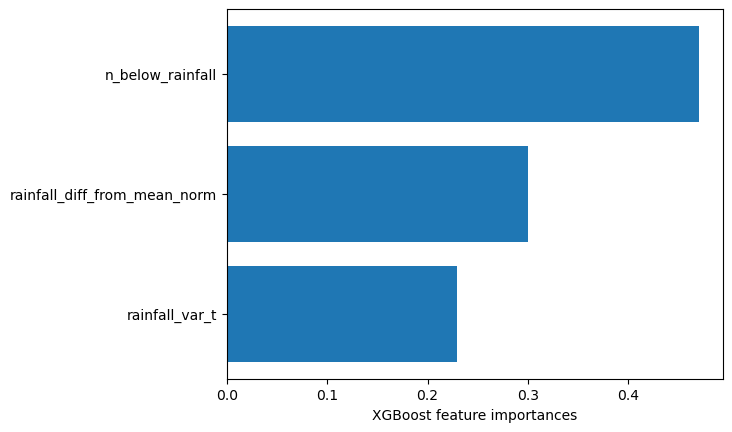

In [27]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBoostRegressorForSklearn())
])

param_grid = {
    'xgb__n_estimators': [10, 100, 500],
    'xgb__max_depth': [1, 3, 5, 10]
}

grid = GridSearchCV(pipe, param_grid, scoring='neg_root_mean_squared_error')

feat = ['n_below_rainfall', 'rainfall_var_t', 'rainfall_diff_from_mean_norm']

target = 'gdp_g'

X = subset[feat]
y = subset[target]

grid.fit(X, y)

print(grid.best_params_, grid_cv.best_score_)

best_model = grid.best_estimator_.named_steps['xgb']
sorted_idx = best_model.estimator.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], best_model.estimator.feature_importances_[sorted_idx])
plt.xlabel('XGBoost feature importances')
plt.plot()

## Proper model testing with CV

In [28]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error

In [29]:
feats = ['n_below_rainfall', 'rainfall_var_t', 'rainfall_diff_from_mean_norm', 'cum_rainfall_diff',
         'oil_rent', 'pt_gdp_agriculture']
target = 'gdp_g'

models = [LinearRegression(), xgb.XGBRegressor(n_estimators=100, max_depth=3), RandomForestRegressor(n_estimators=100, max_depth=3)]

train, test = train_test_split(subset, test_size=0.2)

n_sp = 5
kfold = KFold(n_splits=n_sp, shuffle=True)

results = []
for im, model in enumerate(models):
    avg_rmse = 0
    for i, (train_index, test_index) in enumerate(kfold.split(train)):
        tt = train.iloc[train_index]
        ho = train.iloc[test_index]

        model.fit(tt[feats], tt[target])
        preds = model.predict(ho[feats])
        rmse = root_mean_squared_error(ho[target], preds)

        avg_rmse += rmse

    avg_rmse /= n_sp
    results.append(avg_rmse)

In [30]:
results

[0.06754731178041888, 0.06972749204604789, 0.06774766607729094]

In [31]:
feats = ['rainfall_var_t', 'rainfall_var_t_1', 'Year']
target = 'gdp_g'

models = [LinearRegression(), xgb.XGBRegressor(n_estimators=100, max_depth=3), RandomForestRegressor(n_estimators=100, max_depth=3)]

train, test = train_test_split(subset, test_size=0.2)

n_sp = 5
kfold = KFold(n_splits=n_sp, shuffle=True)

results = []
for im, model in enumerate(models):
    avg_rmse = 0
    for i, (train_index, test_index) in enumerate(kfold.split(train)):
        tt = train.iloc[train_index]
        ho = train.iloc[test_index]

        model.fit(tt[feats], tt[target])
        preds = model.predict(ho[feats])
        rmse = root_mean_squared_error(ho[target], preds)

        avg_rmse += rmse

    avg_rmse /= n_sp
    results.append(avg_rmse)

In [32]:
results

[0.06718473253626224, 0.0682855807241996, 0.0668796725887496]